**Importing all the necessary libraries**

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re


from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
from scipy import stats
from scipy.stats import boxcox
import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import os
from sklearn import preprocessing,metrics 
from IPython.core.display import HTML
pd.set_option("display.max_columns",75)
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import (accuracy_score, roc_auc_score, precision_score, 
                           recall_score, f1_score, confusion_matrix, 
                           roc_curve, classification_report)
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb

In [ ]:
loan_df =pd.read_csv("loan-data.csv",dtype=object)

#Check Shape,Info(Number of Rows and Columns) and datatype of loan data
#Also checking if file is read properly and is converted to the dataframe
print("Shape of the data frame :",loan_df.shape)
print("===================================================")
print("Information about the data frame :",loan_df.info())

Shape of the data frame : (11376, 30)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11376 entries, 0 to 11375
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    11376 non-null  object
 1   loan_amnt             11376 non-null  object
 2   term                  11376 non-null  object
 3   int_rate              11376 non-null  object
 4   installment           11376 non-null  object
 5   grade                 11376 non-null  object
 6   sub_grade             11376 non-null  object
 7   emp_title             10657 non-null  object
 8   emp_length            10666 non-null  object
 9   home_ownership        11376 non-null  object
 10  annual_inc            11376 non-null  object
 11  verification_status   11376 non-null  object
 12  issue_d               11376 non-null  object
 13  loan_status           11376 non-null  object
 14  purpose               11376 non-null  object
 15

| Column Name                   | Description                                                                                       |
|-------------------------------|---------------------------------------------------------------------------------------------------|
| id                            | Unique identifier for each loan record.                                                          |
| loan_amnt                    | The total amount of the loan requested or granted.                                              |
| term                          | The duration of the loan, typically expressed in months (e.g., 36 months or 60 months).        |
| int_rate                      | The interest rate on the loan, expressed as a percentage.                                       |
| installment                   | The monthly payment amount that the borrower needs to make.                                      |
| grade                         | A letter grade assigned to the loan based on the risk and creditworthiness of the borrower.     |
| sub_grade                     | A more specific categorization within the grade, providing finer granularity (e.g., C1, C2).   |
| emp_title                     | The job title of the borrower.                                                                    |
| emp_length                    | The length of time the borrower has been employed, often expressed in years.                    |
| home_ownership                | The borrower's home ownership status (e.g., MORTGAGE, RENT, OWN).                              |
| annual_inc                    | The annual income of the borrower.                                                                |
| verification_status           | Indicates whether the borrower's income has been verified (e.g., Not Verified, Source Verified). |
| issue_d                       | The date when the loan was issued.                                                                |
| loan_status                   | The current status of the loan (e.g., Fully Paid, Charged Off).                                 |
| purpose                       | The stated purpose for taking out the loan (e.g., debt consolidation, home improvement).         |
| title                         | A brief description or title of the loan purpose.                                               |
| zip_code                      | The ZIP code of the borrower's address.                                                           |
| addr_state                    | The state where the borrower resides.                                                             |
| dti                           | Debt-to-Income ratio, measuring monthly debt payments in relation to monthly income.            |
| earliest_cr_line              | The date of the borrower's earliest credit line, indicating credit history length.               |
| fico_range_low                | The lower bound of the borrower's FICO credit score range.                                      |
| fico_range_high               | The upper bound of the borrower's FICO credit score range.                                      |
| open_acc                      | The number of open credit accounts the borrower has.                                            |
| initial_list_status           | The initial listing status of the loan (e.g., w for "with" or f for "for sale").               |
| application_type              | Indicates whether the loan application is individual or joint.                                   |
| mort_acc                      | The number of mortgage accounts the borrower has.                                               |
| pub_rec_bankruptcies         | The number of public record bankruptcies associated with the borrower.                          |
| revol_bal                     | The total balance of revolving credit accounts (e.g., credit cards).                             |
| revol_util                    | The percentage of revolving credit being utilized by the borrower.                               |
| total_acc                     | The total number of credit accounts the borrower has.                                           |
| loan_amnt_categories          | Categories for the loan amount, grouping loans into ranges.                                      |
| annual_inc_categories          | Categories for annual income, grouping borrowers into income ranges.                             |
| interest_rate_categories       | Categories for interest rates, grouping loans into ranges.                                       |
| dti_categories                | Categories for the debt-to-income ratio, grouping borrowers into ranges.                        |


In [3]:
loan_df.head()

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,earliest_cr_line,fico_range_low,fico_range_high,open_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,revol_bal,revol_util,total_acc
0,68407277,3600,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000,Not Verified,Dec-15,Fully Paid,debt_consolidation,Debt consolidation,190xx,PA,5.91,Aug-03,675,679,7,w,Individual,1,0,2765,29.7,13
1,68355089,24700,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000,Not Verified,Dec-15,Fully Paid,small_business,Business,577xx,SD,16.06,Dec-99,715,719,22,w,Individual,4,0,21470,19.2,38
2,68341763,20000,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000,Not Verified,Dec-15,Fully Paid,home_improvement,NaN,605xx,IL,10.78,Aug-00,695,699,6,w,Joint App,5,0,7869,56.2,18
3,68476807,10400,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433,Source Verified,Dec-15,Fully Paid,major_purchase,Major purchase,174xx,PA,25.37,Jun-98,695,699,12,w,Individual,6,0,21929,64.5,35
4,68426831,11950,36 months,13.44,405.18,C,C3,Veterinary Tecnician,4 years,RENT,34000,Source Verified,Dec-15,Fully Paid,debt_consolidation,Debt consolidation,300xx,GA,10.2,Oct-87,690,694,5,w,Individual,0,0,8822,68.4,6


In [4]:
loan_df["loan_status"].values

array(['Fully Paid', 'Fully Paid', 'Fully Paid', ..., 'Charged Off',
       'Charged Off', 'Charged Off'], dtype=object)

In [5]:
# Checking for Duplicate rows in the dataset.
print(loan_df.duplicated(subset=None,keep='first').count())

# The column used for checking is id column
duplicate_rows=loan_df[loan_df.duplicated(['id'])]
print("duplicate_rows :", duplicate_rows)



11376
duplicate_rows : Empty DataFrame
Columns: [id, loan_amnt, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, purpose, title, zip_code, addr_state, dti, earliest_cr_line, fico_range_low, fico_range_high, open_acc, initial_list_status, application_type, mort_acc, pub_rec_bankruptcies, revol_bal, revol_util, total_acc]
Index: []


In [6]:
#Data Manipulation and Cleaning step for removing % symbol from interest rate column to be used in analysis further
loan_df['int_rate']=loan_df['int_rate'].str.rstrip('%')

#Data Manipulation and Cleaning step for removing % symbol from revol_util column to be used in analysis further
loan_df['revol_util']=loan_df['revol_util'].str.rstrip('%')


In [7]:
# Converting amount columns to numeric data as these values will be used in data modeling and plotting
columns1=['loan_amnt','int_rate','installment','annual_inc','dti',]
loan_df[columns1]=loan_df[columns1].apply(pd.to_numeric)

In [8]:
# Dropping the current customers as they are not required for driving factors consideration.
loan_df = loan_df[loan_df.loan_status != "Current"]

In [9]:
print("Shape of the data frame :",loan_df.shape)
print("===================================================")
print("Information about the data frame :",loan_df.info())
print("===================================================")
print("The data types of columns of data frame",loan_df.dtypes)

Shape of the data frame : (11376, 30)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 11376 entries, 0 to 11375
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    11376 non-null  object 
 1   loan_amnt             11376 non-null  int64  
 2   term                  11376 non-null  object 
 3   int_rate              11376 non-null  float64
 4   installment           11376 non-null  float64
 5   grade                 11376 non-null  object 
 6   sub_grade             11376 non-null  object 
 7   emp_title             10657 non-null  object 
 8   emp_length            10666 non-null  object 
 9   home_ownership        11376 non-null  object 
 10  annual_inc            11376 non-null  float64
 11  verification_status   11376 non-null  object 
 12  issue_d               11376 non-null  object 
 13  loan_status           11376 non-null  object 
 14  purpose               11376 non-

In [10]:
(loan_df.loan_status.value_counts()*100)/len(loan_df)

Fully Paid     59.379395
Charged Off    40.620605
Name: loan_status, dtype: float64

In [11]:
#Finding out percentages of various purpose of loans out of total loans issued

(loan_df.purpose.value_counts()*100)/len(loan_df)

debt_consolidation    57.480661
credit_card           22.609001
other                  6.214838
home_improvement       6.021449
major_purchase         2.347046
small_business         1.169128
medical                1.133966
car                    0.958158
vacation               0.826301
moving                 0.703235
house                  0.492264
renewable_energy       0.043952
Name: purpose, dtype: float64

In [12]:
quant_info = loan_df.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.99])
quant_info

0.50     65000.0
0.75     93000.0
0.90    125000.0
0.95    150000.0
0.99    250000.0
Name: annual_inc, dtype: float64

In [13]:
#Getting quantitative variables with describe for loan amount
loan_df['loan_amnt'].describe()

count    11376.000000
mean     14782.513625
std       8853.202579
min       1000.000000
25%       8000.000000
50%      13000.000000
75%      20000.000000
max      40000.000000
Name: loan_amnt, dtype: float64

In [14]:
quant_info = loan_df["loan_amnt"].quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quant_info

0.50    13000.00
0.75    20000.00
0.90    28000.00
0.95    33768.75
0.97    35000.00
0.98    35000.00
0.99    35000.00
Name: loan_amnt, dtype: float64

In [15]:
#Basic Statistics with Interest Rate

loan_df['int_rate'].describe()

count    11376.000000
mean        13.158092
std          4.692409
min          5.310000
25%          9.800000
50%         12.675000
75%         16.140000
max         30.990000
Name: int_rate, dtype: float64

In [16]:
quant_info = loan_df["int_rate"].quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quant_info

0.50    12.675
0.75    16.140
0.90    18.990
0.95    21.480
0.97    23.400
0.98    24.990
0.99    26.990
Name: int_rate, dtype: float64

**Exploratory Data Analysis**

In [17]:
#Creating Bins for further analysis
#Creating categories for loan amounts for further bivariate analysis
loan_df['loan_amnt_categories']=pd.cut(loan_df['loan_amnt'],[0,7000,14000,21000,28000,35000],labels=['0-7000','7000-14000','14000-21000','21000-28000','28000+'])

#Creating categories for annual incomes for further bivariate analysis
loan_df['annual_inc_categories']=pd.cut(loan_df['annual_inc'],[0,20000,40000,60000,80000,1000000],labels=['0-20000','20000-40000','40000-60000','60000-80000','80000+'])

#Creating categories for interest rates for further bivariate analysis
loan_df['interest_rate_categories']=pd.cut(loan_df['int_rate'],[0,10,12.5,16,20],labels=['0-10','10-13','12.5-16','16+'])

#Creating dti into buckets for further bivariate analysis
loan_df['dti_categories']=pd.cut(loan_df['dti'],[0,5,10,15,20,25],labels=['0-5','5-10','10-15','15-20','25+'])

print(loan_df.shape)

loan_df.head(5)

(11376, 34)


,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,earliest_cr_line,fico_range_low,fico_range_high,open_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,revol_bal,revol_util,total_acc,loan_amnt_categories,annual_inc_categories,interest_rate_categories,dti_categories
0,68407277,3600,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-15,Fully Paid,debt_consolidation,Debt consolidation,190xx,PA,5.91,Aug-03,675,679,7,w,Individual,1,0,2765,29.7,13,0-7000,40000-60000,12.5-16,5-10
1,68355089,24700,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-15,Fully Paid,small_business,Business,577xx,SD,16.06,Dec-99,715,719,22,w,Individual,4,0,21470,19.2,38,21000-28000,60000-80000,10-13,15-20
2,68341763,20000,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-15,Fully Paid,home_improvement,NaN,605xx,IL,10.78,Aug-00,695,699,6,w,Joint App,5,0,7869,56.2,18,14000-21000,60000-80000,10-13,10-15
3,68476807,10400,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Dec-15,Fully Paid,major_purchase,Major purchase,174xx,PA,25.37,Jun-98,695,699,12,w,Individual,6,0,21929,64.5,35,7000-14000,80000+,NaN,NaN
4,68426831,11950,36 months,13.44,405.18,C,C3,Veterinary Tecnician,4 years,RENT,34000.0,Source Verified,Dec-15,Fully Paid,debt_consolidation,Debt consolidation,300xx,GA,10.20,Oct-87,690,694,5,w,Individual,0,0,8822,68.4,6,7000-14000,20000-40000,12.5-16,10-15


In [18]:
## Extracting month and year
df_month_year = loan_df['issue_d'].str.partition("-", True)     
loan_df['issue_month']=df_month_year[0]                       
loan_df['issue_year']='20' + df_month_year[2]

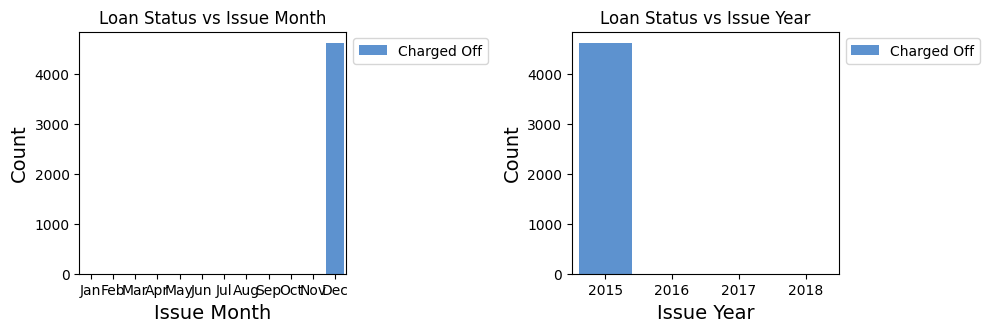

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data setup (replace this with your actual DataFrame)
# loan_df = your_data_here

# Define the order of the months and years
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
year_order = ['2015', '2016', '2017', '2018']  # Specify the desired order of years

# Set up the figure
plt.figure(figsize=(10, 6), facecolor='white')

# Define the color for the bars
blue_color = '#4A90E2'  # Replace with the specific blue color you want

# Subplot 1: Loan Status vs Issue Month
plt.subplot(221)
ax = sns.countplot(x='issue_month', data=loan_df[loan_df['loan_status'] == 'Charged Off'],
                   hue='loan_status', palette=[blue_color], order=month_order)  # Use the defined month order
ax.set(title='Loan Status vs Issue Month')
ax.set_xlabel('Issue Month', fontsize=14, color='black')  # Set to black for visibility
ax.set_ylabel('Count', fontsize=14, color='black')  # Set to black for visibility
ax.legend(bbox_to_anchor=(1, 1))
plt.xticks(color='black')  # Set x-axis labels to black
plt.yticks(color='black')  # Set y-axis labels to black

# Subplot 2: Loan Status vs Issue Year
plt.subplot(222)
ax = sns.countplot(x='issue_year', data=loan_df[loan_df['loan_status'] == 'Charged Off'],
                   hue='loan_status', palette=[blue_color], order=year_order)  # Use the defined year order
ax.set(title='Loan Status vs Issue Year')
ax.set_xlabel('Issue Year', fontsize=14, color='black')  # Set to black for visibility
ax.set_ylabel('Count', fontsize=14, color='black')  # Set to black for visibility
ax.legend(bbox_to_anchor=(1, 1))
plt.xticks(color='black')  # Set x-axis labels to black
plt.yticks(color='black')  # Set y-axis labels to black

# Show the plots
plt.tight_layout()
plt.show()


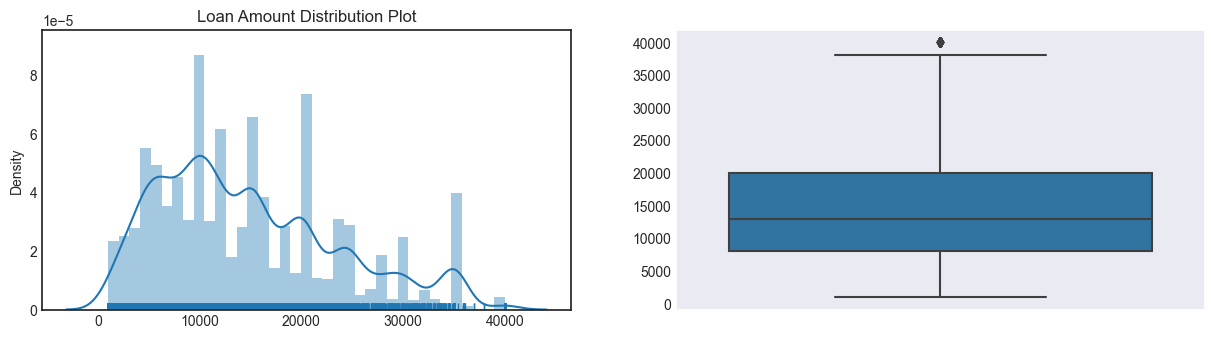

In [20]:
with plt.style.context('seaborn-v0_8-white'):
  plt.figure(figsize=(15,8),facecolor='w')
  
  #Subplot 1

  plt.subplot(2,2,1)
  ax=sns.distplot(loan_df['loan_amnt'],rug=True)
  ax.set(title='Loan Amount Distribution Plot')
  ax.set_xlabel('Loan Amount', fontsize=10,color='w')

  #Subplot 2
  sns.set_style("dark")

  plt.subplot(2,2,2)
  ax=sns.boxplot(y=loan_df['loan_amnt'])
  ax.set_ylabel('Loan Amount', fontsize=10,color='w')
  plt.show()

Text(0, 0.5, 'Interest Rate')

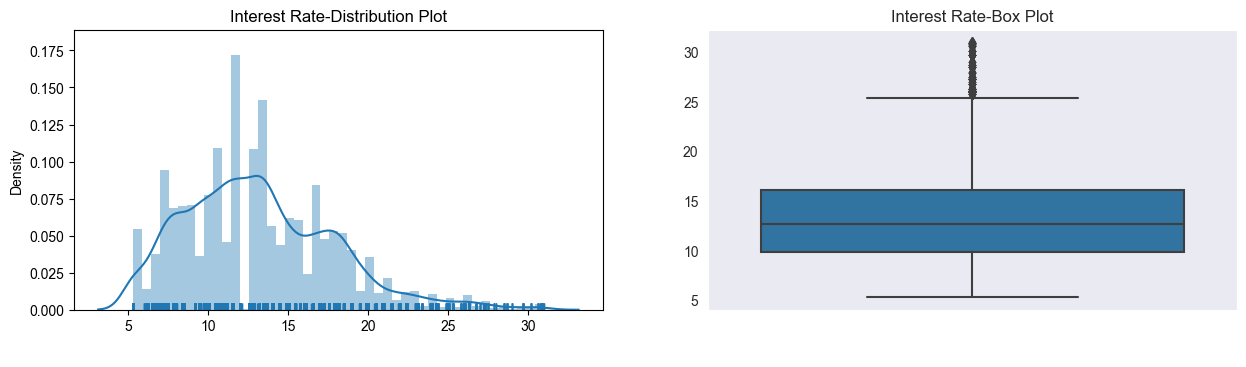

In [21]:
plt.figure(figsize=(15,8),facecolor='w')



plt.subplot(2,2,1)
ax=sns.distplot(loan_df['int_rate'],rug=True)
ax.set(title='Interest Rate-Distribution Plot')
ax.set_xlabel('Interest Rate',fontsize=14,color='w')

#subplot 2
sns.set_style("dark")
plt.subplot(2,2,2)
ax=sns.boxplot(y=loan_df['int_rate'])
ax.set(title='Interest Rate-Box Plot')
ax.set_ylabel('Interest Rate',fontsize=14,color='w')

Text(0, 0.5, 'Annual Income')

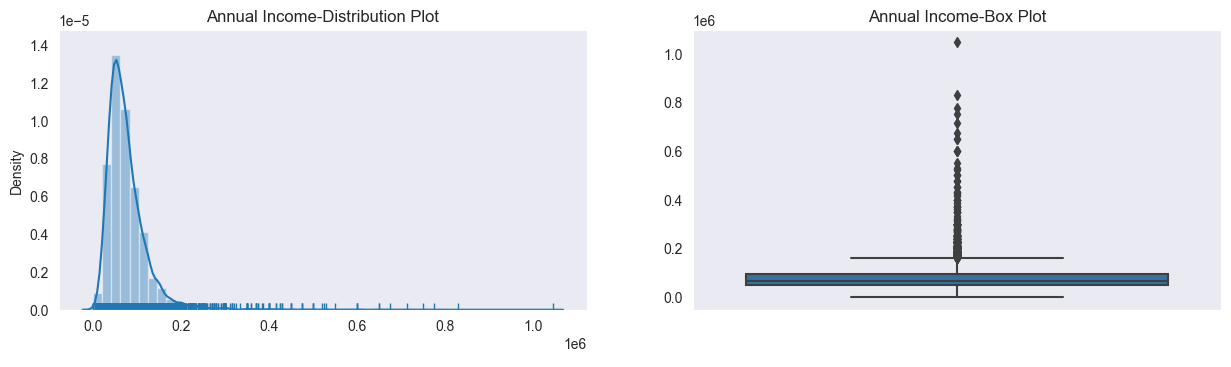

In [22]:
plt.figure(figsize=(15,8),facecolor='w')


  #Subplot1
plt.subplot(2,2,1)
ax=sns.distplot(loan_df['annual_inc'],rug=True)
ax.set(title='Annual Income-Distribution Plot')
ax.set_xlabel('Annual Income',fontsize=14,color='w')

#Subplot2
sns.set_style("dark")
plt.subplot(2,2,2)
ax=sns.boxplot(y=loan_df['annual_inc'])
ax.set(title='Annual Income-Box Plot')
ax.set_ylabel('Annual Income',fontsize=14,color='w')

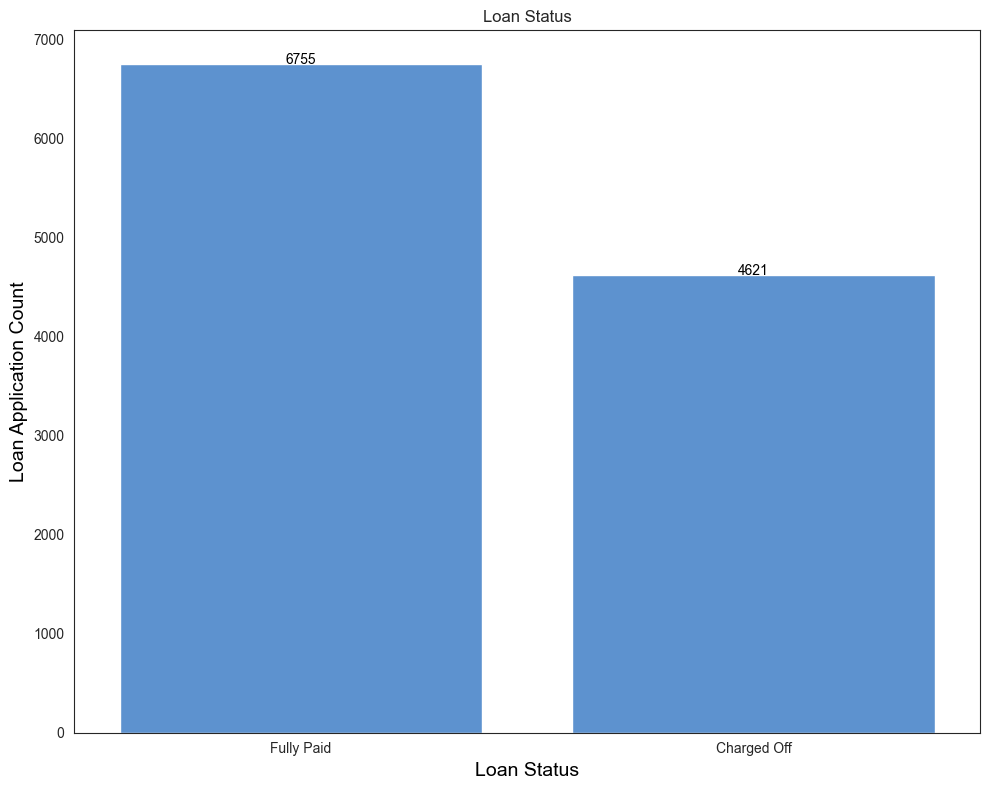

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data setup (replace this with your actual DataFrame)
# loan_df = your_data_here

# Set up the figure
plt.figure(figsize=(10, 8), facecolor='w')
sns.set_style("white")

# Create the count plot with blue color
ax = sns.countplot(x="loan_status", data=loan_df, palette=['#4A90E2'])  # Use a blue color

# Set titles and labels
ax.set(title='Loan Status')
ax.set_xlabel('Loan Status', fontsize=14, color='black')  # Change to black for visibility
ax.set_ylabel('Loan Application Count', fontsize=14, color='black')  # Change to black for visibility

# Adding counts on top of the bars
s = loan_df['loan_status'].value_counts()
for i, v in enumerate(s):
    ax.text(i, v + 0.3, str(v), color='k', ha='center')  # Correctly place the count above the bars

# Show the plot
plt.tight_layout()
plt.show()


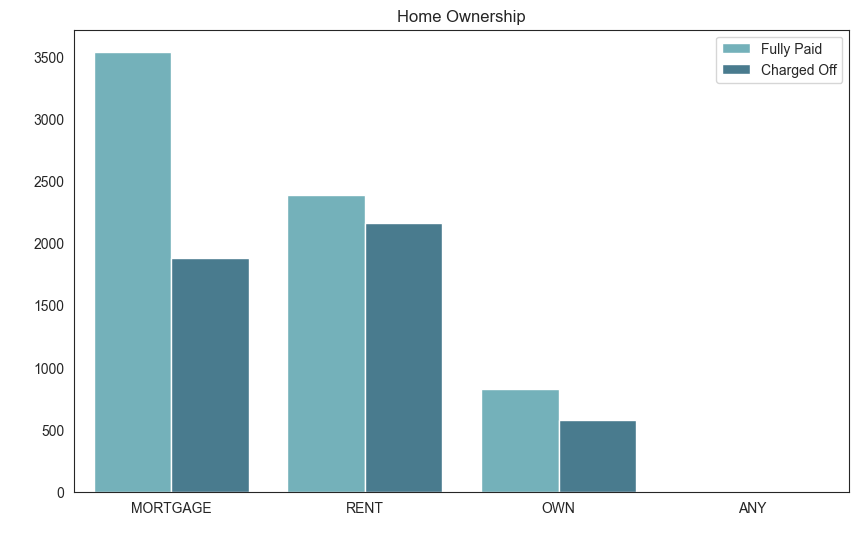

In [24]:
plt.figure(figsize=(10,6),facecolor='w')
ax=sns.countplot(x="home_ownership",data=loan_df,hue='loan_status',palette='GnBu_d')
ax.legend(bbox_to_anchor=(1,1))
ax.set(title='Home Ownership')
ax.set_xlabel('Home Ownership',fontsize=14,color='w')
ax.set_ylabel('Loan Application Count',fontsize=14,color='w')
plt.show()


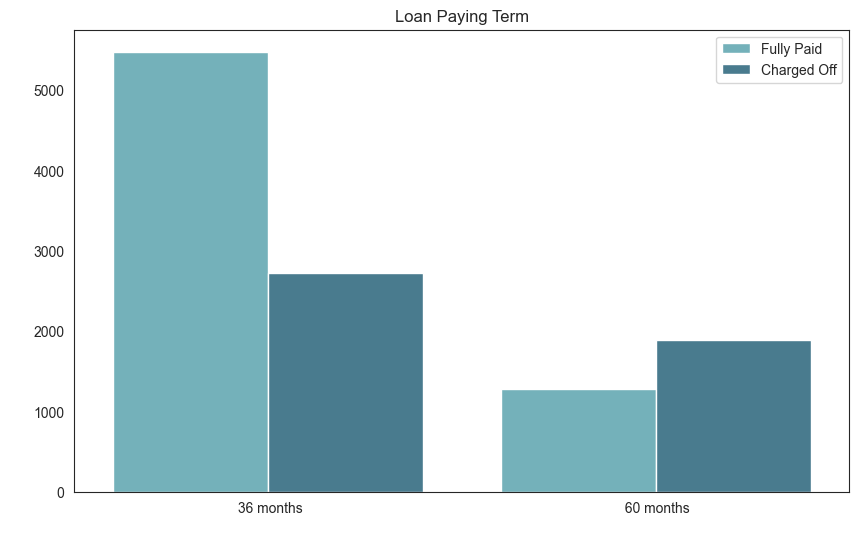

In [25]:
plt.figure(figsize=(10,6),facecolor='w')
ax=sns.countplot(x="term",data=loan_df,hue='loan_status',palette='GnBu_d')
ax.set(title='Loan Paying Term')
ax.set_xlabel('Loan Repayment Term',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

In [26]:
loan_df.columns

Index(['id', 'loan_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'earliest_cr_line', 'fico_range_low',
       'fico_range_high', 'open_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'revol_bal',
       'revol_util', 'total_acc', 'loan_amnt_categories',
       'annual_inc_categories', 'interest_rate_categories', 'dti_categories',
       'issue_month', 'issue_year'],
      dtype='object')

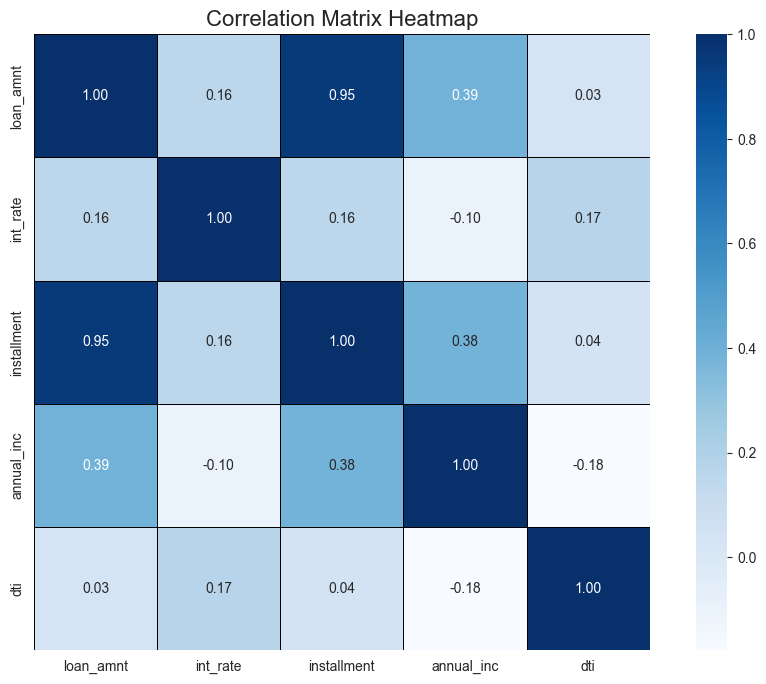

In [27]:

# Step 2: Select only numeric columns
numeric_loan_df = loan_df.select_dtypes(include=['number'])

# Step 3: Calculate the correlation matrix
loan_correlation = numeric_loan_df.corr()

# Step 4: Create a heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(loan_correlation, annot=True, fmt=".2f", cmap='Blues', square=True, cbar=True, 
            linewidths=0.5, linecolor='black')

# Set the title
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()


In [28]:

inc_range_vs_loan = loan_df.groupby(['annual_inc_categories', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_range_vs_loan['Total'] = inc_range_vs_loan['Charged Off'] + inc_range_vs_loan['Fully Paid'] 
inc_range_vs_loan['Chargedoff_Proportion'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']
inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,annual_inc_categories,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,0-20000,99,94,193,0.512953
1,20000-40000,797,935,1732,0.460162
2,40000-60000,1369,1752,3121,0.438641
3,60000-80000,1035,1485,2520,0.410714
4,80000+,1321,2485,3806,0.347084


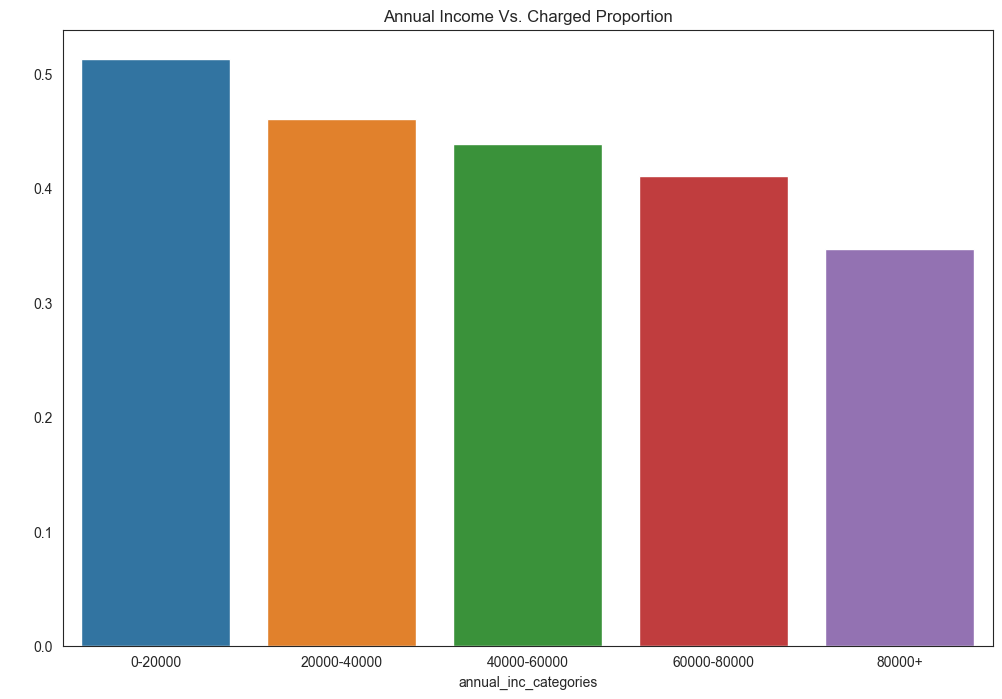

In [29]:
#Drawing Barplots on above calculated data
fig,ax1=plt.subplots(figsize=(12,8),facecolor='w')
ax1.set(title='Annual Income Vs. Charged Proportion')
ax1=sns.barplot(x='annual_inc_categories',y='Chargedoff_Proportion',data=inc_range_vs_loan)
ax.set_xlabel('Charged Off Proportion',fontsize=14,color='w')
ax1.set_ylabel('Annual Income',fontsize=14,color='w')
plt.show()

In [30]:
purpose_vs_loan = loan_df.groupby(['purpose','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total']=purpose_vs_loan['Charged Off']+purpose_vs_loan['Fully Paid']
purpose_vs_loan['ChargedOff_Proportion']=purpose_vs_loan['Charged Off']/purpose_vs_loan['Total']
purpose_vs_loan.sort_values('ChargedOff_Proportion',ascending=False)

loan_status,purpose,Charged Off,Fully Paid,Total,ChargedOff_Proportion
10,small_business,77,56,133,0.578947
6,medical,61,68,129,0.472868
7,moving,35,45,80,0.437500
2,debt_consolidation,2821,3718,6539,0.431412
4,house,23,33,56,0.410714
5,major_purchase,104,163,267,0.389513
8,other,265,442,707,0.374823
1,credit_card,953,1619,2572,0.370529
11,vacation,34,60,94,0.361702
3,home_improvement,215,470,685,0.313869


Text(0.5, 0, 'ChargedOff Proportion')

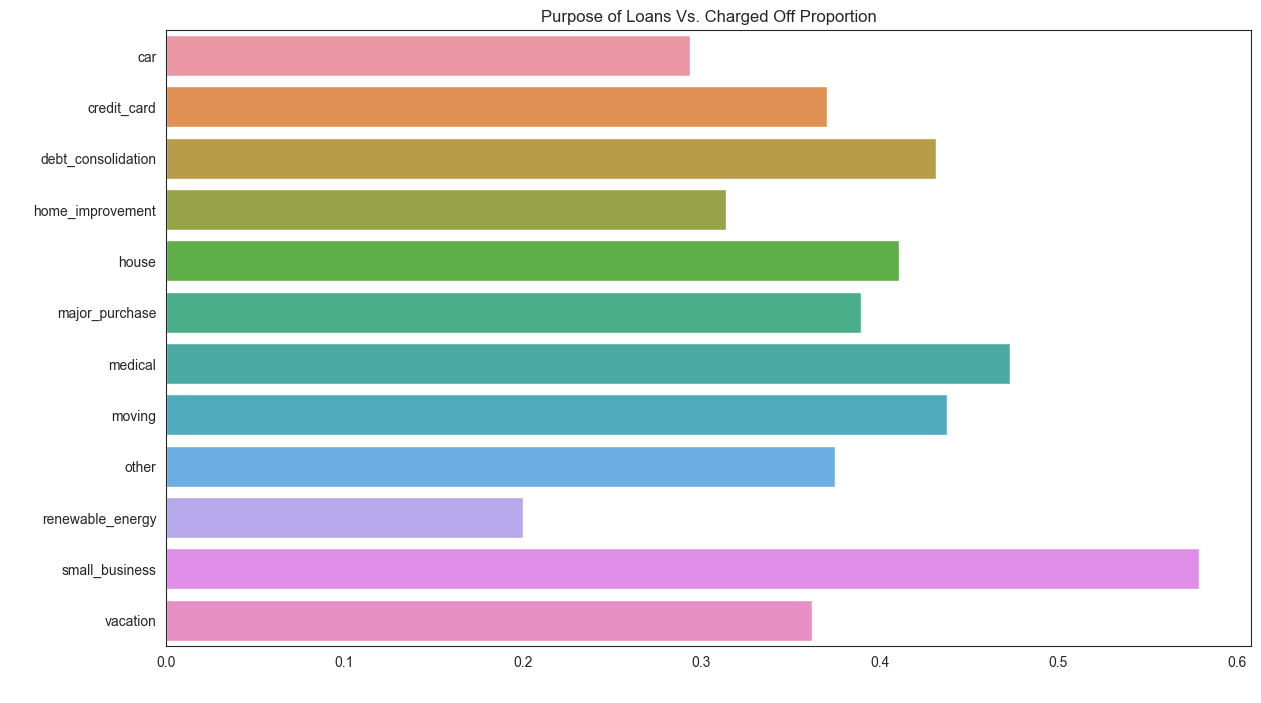

In [31]:
#Drawing Bar Charts from above data


fig,ax1=plt.subplots(figsize=(14,8),facecolor='w')
ax1.set(title='Purpose of Loans Vs. Charged Off Proportion')
ax1=sns.barplot(y='purpose',x='ChargedOff_Proportion',data=purpose_vs_loan)
ax1.set_ylabel('Purpose of Loans',fontsize=14,color='w')
ax1.set_xlabel('ChargedOff Proportion',fontsize=14,color='w')

In [32]:

grade_vs_loan=loan_df.groupby(['grade','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off'] + grade_vs_loan['Fully Paid']
grade_vs_loan['ChargedOff_Proportion']=grade_vs_loan['Charged Off']/grade_vs_loan['Total']
grade_vs_loan.sort_values('ChargedOff_Proportion',ascending=False)


loan_status,grade,Charged Off,Fully Paid,Total,ChargedOff_Proportion
6,G,53,20,73,0.726027
5,F,215,96,311,0.691318
4,E,636,293,929,0.684607
3,D,1030,794,1824,0.564693
2,C,1504,1863,3367,0.446688
1,B,976,2136,3112,0.313625
0,A,207,1553,1760,0.117614


Text(0, 0.5, 'Charged Off Proportion')

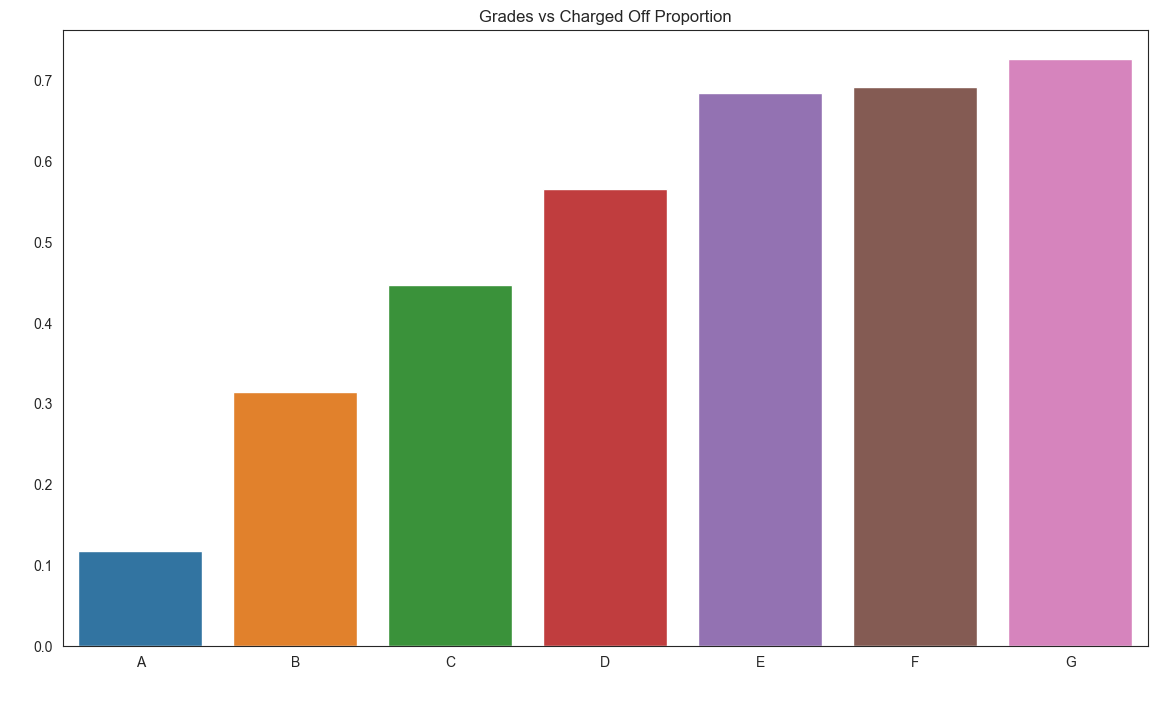

In [33]:
fig,ax1=plt.subplots(figsize=(14,8),facecolor='w')
ax1.set(title='Grades vs Charged Off Proportion')
ax1=sns.barplot(x='grade',y='ChargedOff_Proportion',data=grade_vs_loan)
ax1.set_xlabel('Grades',fontsize=14,color='w')
ax1.set_ylabel('Charged Off Proportion',fontsize=14,color='w')

In [34]:
grade_vs_loan=loan_df.groupby(['sub_grade','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total']=grade_vs_loan['Charged Off'] + grade_vs_loan['Fully Paid']
grade_vs_loan['ChargedOff_Proportion']=grade_vs_loan['Charged Off']/grade_vs_loan['Total']
grade_vs_loan.sort_values('ChargedOff_Proportion',ascending=False)


loan_status,sub_grade,Charged Off,Fully Paid,Total,ChargedOff_Proportion
31,G2,19,2,21,0.904762
29,F5,31,7,38,0.815789
30,G1,15,5,20,0.750000
28,F4,27,10,37,0.729730
27,F3,47,19,66,0.712121
20,E1,151,65,216,0.699074
22,E3,128,56,184,0.695652
23,E4,113,50,163,0.693252
21,E2,148,66,214,0.691589
33,G4,8,4,12,0.666667


Text(0, 0.5, 'ChargedOff Proportion')

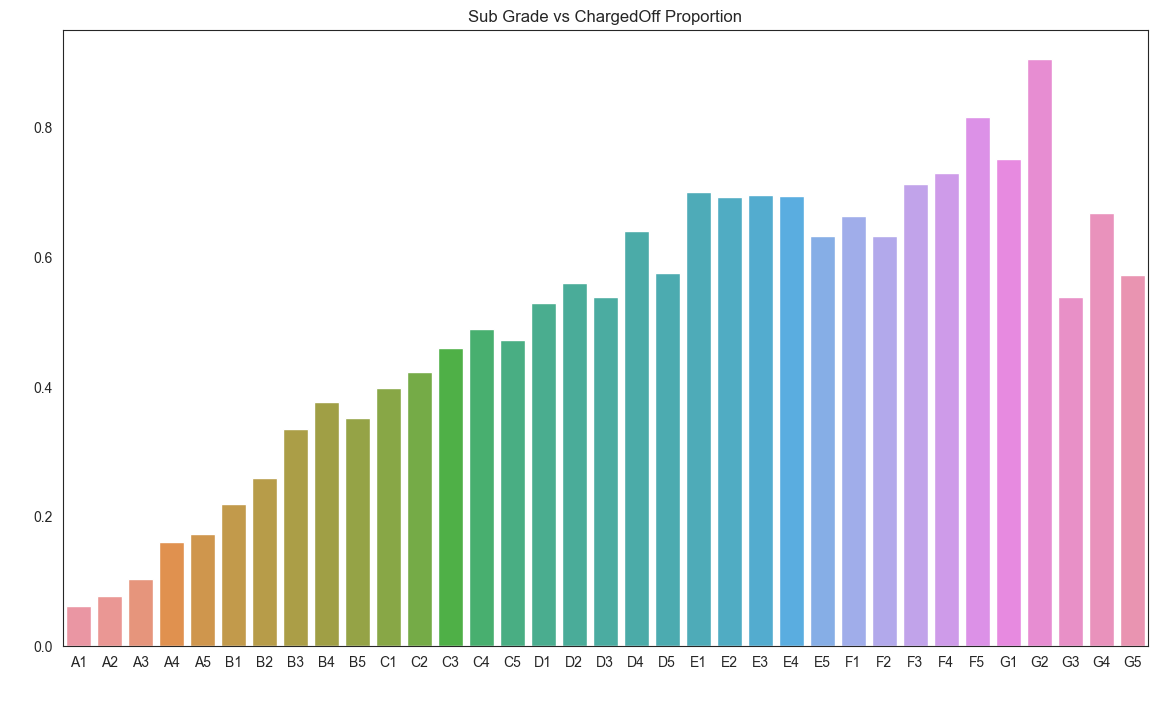

In [35]:
fig,ax1=plt.subplots(figsize=(14,8),facecolor='w')
ax1.set(title='Sub Grade vs ChargedOff Proportion')
ax1=sns.barplot(x='sub_grade',y='ChargedOff_Proportion',data=grade_vs_loan)
ax1.set_xlabel('Sub Grades',fontsize=14,color='w')
ax1.set_ylabel('ChargedOff Proportion',fontsize=14,color='w')

In [36]:
interest_vs_loan = loan_df.groupby(['interest_rate_categories','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
interest_vs_loan['Total'] = interest_vs_loan['Charged Off'] + interest_vs_loan['Fully Paid']
interest_vs_loan['ChargedOff_Proportion'] = interest_vs_loan['Charged Off']/interest_vs_loan['Total']
interest_vs_loan.sort_values('ChargedOff_Proportion',ascending=False)


loan_status,interest_rate_categories,Charged Off,Fully Paid,Total,ChargedOff_Proportion
3,16+,1318,902,2220,0.593694
2,12.5-16,1439,1562,3001,0.479507
1,10-13,794,1342,2136,0.371723
0,0-10,689,2579,3268,0.210832


Text(0, 0.5, 'Charged Off Proportion')

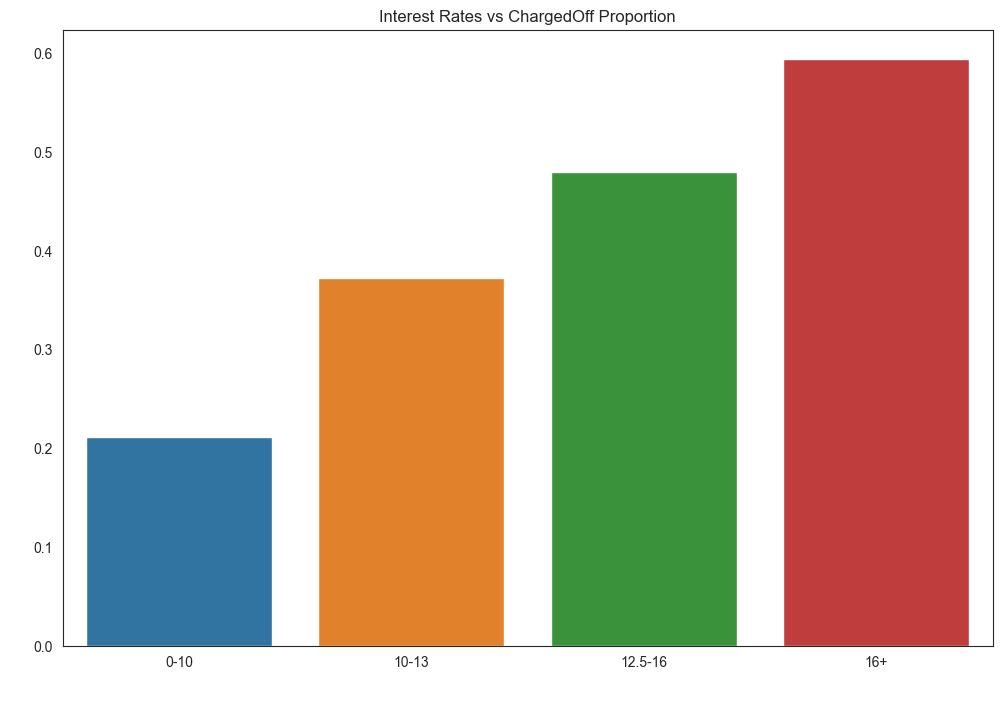

In [37]:
fig1,ax1=plt.subplots(figsize=(12,8),facecolor='w')
ax1.set(title='Interest Rates vs ChargedOff Proportion')
ax1=sns.barplot(x='interest_rate_categories',y='ChargedOff_Proportion',data=interest_vs_loan)
ax1.set_xlabel('Interest Rate',fontsize=14,color='w')
ax1.set_ylabel('Charged Off Proportion',fontsize=14,color='w')


In [38]:
emplen_vs_loan = loan_df.groupby(['emp_length','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
emplen_vs_loan['Total'] = emplen_vs_loan['Charged Off'] + emplen_vs_loan['Fully Paid']
emplen_vs_loan['ChargedOff_Proportion'] = emplen_vs_loan['Charged Off']/emplen_vs_loan['Total']
emplen_vs_loan.sort_values('ChargedOff_Proportion',ascending=False)


loan_status,emp_length,Charged Off,Fully Paid,Total,ChargedOff_Proportion
8,8 years,245,296,541,0.452865
9,9 years,169,211,380,0.444737
5,5 years,320,416,736,0.434783
0,1 year,324,432,756,0.428571
3,3 years,399,556,955,0.417801
10,< 1 year,421,587,1008,0.417659
2,2 years,403,598,1001,0.402597
6,6 years,187,279,466,0.401288
7,7 years,146,229,375,0.389333
1,10+ years,1421,2331,3752,0.378731


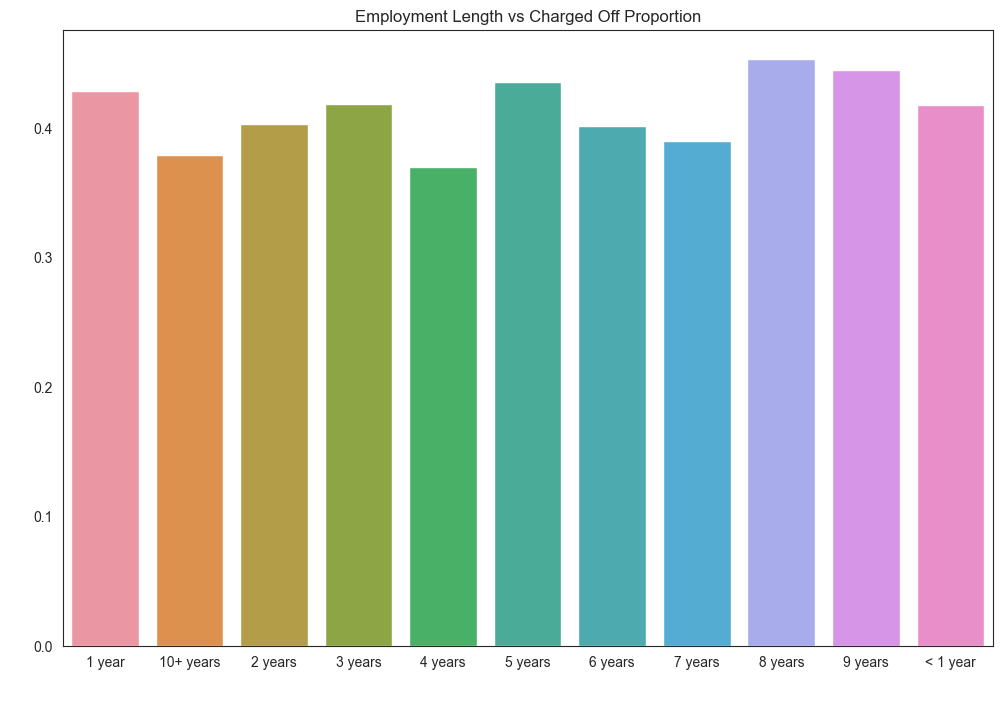

In [39]:
fig,ax1=plt.subplots(figsize=(12,8),facecolor='w')
ax1.set(title='Employment Length vs Charged Off Proportion')
ax1=sns.barplot(x='emp_length',y='ChargedOff_Proportion',data=emplen_vs_loan)
ax1.set_xlabel('Employment Length',fontsize=14,color='w')
ax1.set_ylabel('Charged Off Proportion',fontsize=14,color='w')
plt.show()

In [40]:

state_vs_loan = loan_df.groupby(['addr_state','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
state_vs_loan['Total'] = state_vs_loan['Charged Off'] + state_vs_loan['Fully Paid']
state_vs_loan['ChargedOff_Proportion'] = state_vs_loan['Charged Off']/state_vs_loan['Total']
state_vs_loan.sort_values('ChargedOff_Proportion',ascending=False)

loan_status,addr_state,Charged Off,Fully Paid,Total,ChargedOff_Proportion
27,ND,14.0,11.0,25.0,0.560000
8,DE,15.0,12.0,27.0,0.555556
35,OK,62.0,52.0,114.0,0.543860
28,NE,32.0,29.0,61.0,0.524590
17,LA,71.0,70.0,141.0,0.503546
1,AL,75.0,80.0,155.0,0.483871
0,AK,10.0,12.0,22.0,0.454545
24,MS,29.0,35.0,64.0,0.453125
2,AR,41.0,50.0,91.0,0.450549
37,PA,151.0,185.0,336.0,0.449405


Text(0, 0.5, 'Charged Off Proportion')

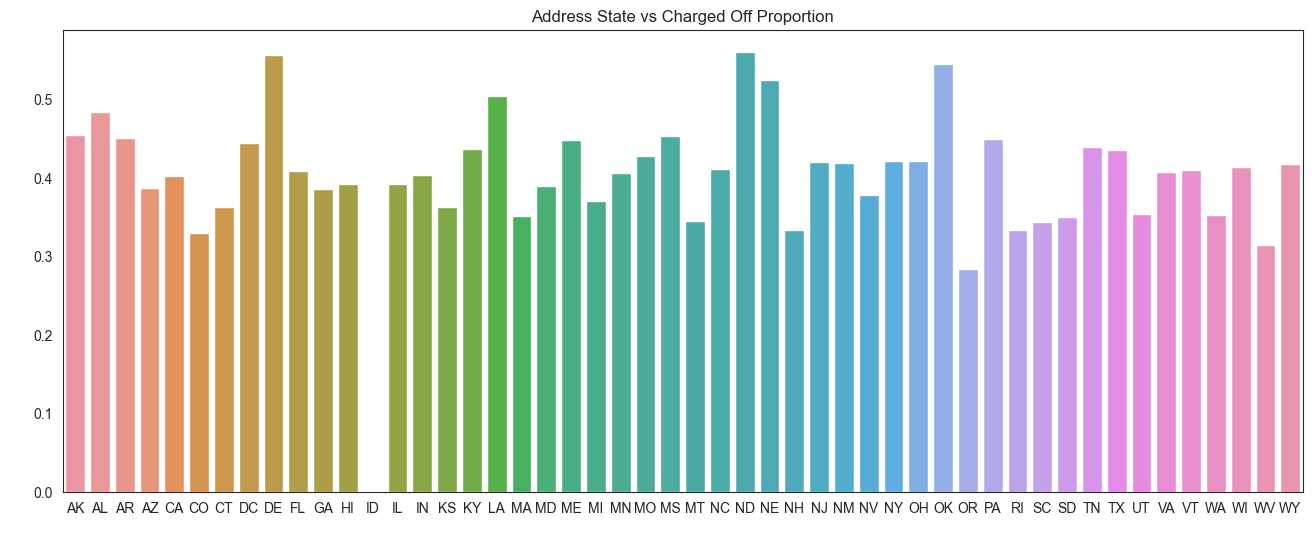

In [41]:
fig,ax1=plt.subplots(figsize=(16,6),facecolor='w')
ax1.set(title='Address State vs Charged Off Proportion')
ax1=sns.barplot(x='addr_state',y='ChargedOff_Proportion',data=state_vs_loan)
ax1.set_xlabel('Address state',fontsize=14,color='w')
ax1.set_ylabel('Charged Off Proportion',fontsize=14,color='w')


In [42]:
verify_vs_loan = loan_df.groupby(['verification_status','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
verify_vs_loan['Total'] = verify_vs_loan['Charged Off']+verify_vs_loan['Fully Paid']
verify_vs_loan['ChargedOff_Proportion'] = verify_vs_loan['Charged Off']+verify_vs_loan['Total']
verify_vs_loan.sort_values('ChargedOff_Proportion',ascending=False)

loan_status,verification_status,Charged Off,Fully Paid,Total,ChargedOff_Proportion
1,Source Verified,1878,2394,4272,6150
2,Verified,1779,1747,3526,5305
0,Not Verified,964,2614,3578,4542


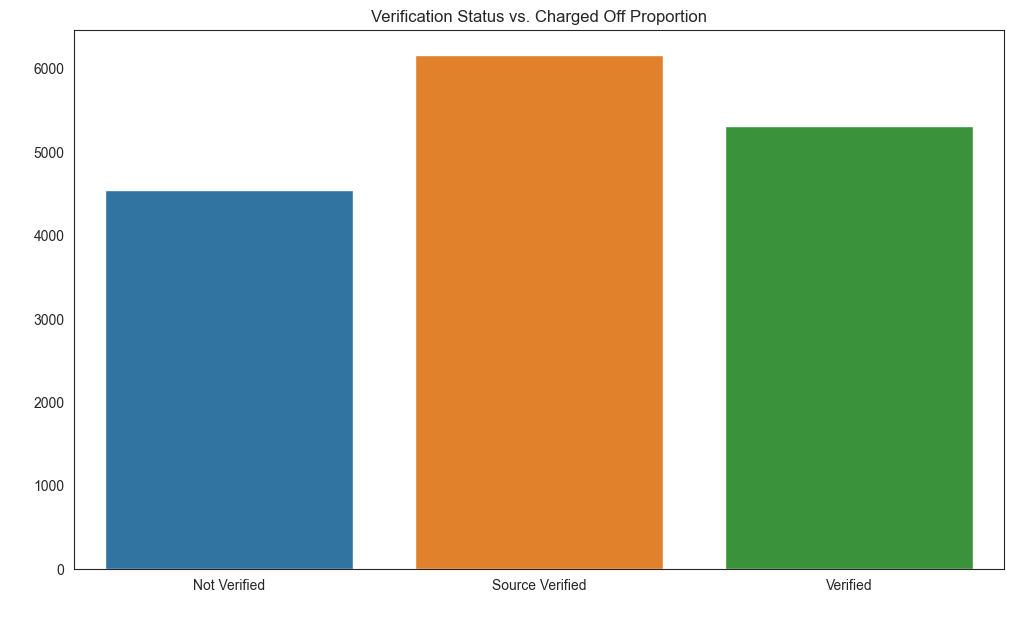

In [43]:
fig,ax1=plt.subplots(figsize=(12,7),facecolor='w')
ax1.set_title('Verification Status vs. Charged Off Proportion')
ax1=sns.barplot(x='verification_status',y='ChargedOff_Proportion',data=verify_vs_loan)
ax1.set_xlabel('Verification Status',fontsize=14,color='w')
ax1.set_ylabel('Charged Off Proportion',fontsize=14,color='w')
plt.show()

In [44]:
bankruptcies_vs_loan = loan_df.groupby(['pub_rec_bankruptcies', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
bankruptcies_vs_loan['Total'] = bankruptcies_vs_loan['Charged Off'] + bankruptcies_vs_loan['Fully Paid']
bankruptcies_vs_loan['ChargedOff_Proportion'] = bankruptcies_vs_loan['Charged Off']/bankruptcies_vs_loan['Total']
bankruptcies_vs_loan.sort_values('ChargedOff_Proportion', ascending=False)


loan_status,pub_rec_bankruptcies,Charged Off,Fully Paid,Total,ChargedOff_Proportion
4,4,4.0,0.0,4.0,1.000000
5,6,1.0,0.0,1.0,1.000000
2,2,37.0,43.0,80.0,0.462500
3,3,6.0,7.0,13.0,0.461538
1,1,604.0,844.0,1448.0,0.417127
0,0,3969.0,5860.0,9829.0,0.403805
6,8,0.0,1.0,1.0,0.000000


Text(0, 0.5, 'Chargedoff Proportion')

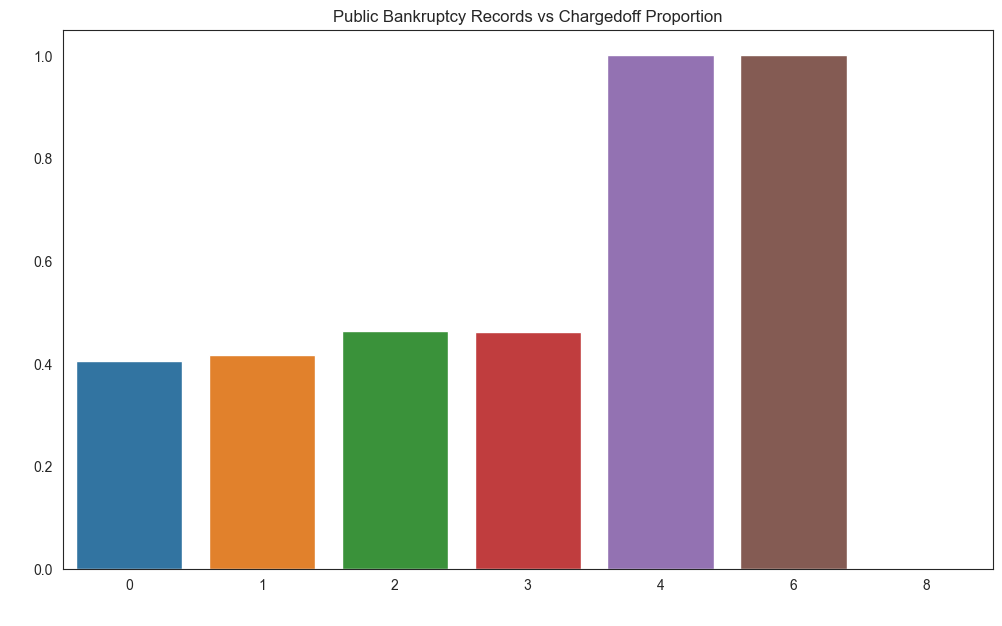

In [45]:
fig,ax1=plt.subplots(figsize=(12,7),facecolor='w')
ax1.set_title('Public Bankruptcy Records vs Chargedoff Proportion')
ax1=sns.barplot(x='pub_rec_bankruptcies',y='ChargedOff_Proportion',data=bankruptcies_vs_loan)
ax1.set_xlabel('Public Bankruptcy Records',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')


In [46]:
bankruptcies_vs_loan['Total'] = bankruptcies_vs_loan['Charged Off'] + bankruptcies_vs_loan['Fully Paid'] 
bankruptcies_vs_loan['Chargedoff_Proportion'] = bankruptcies_vs_loan['Charged Off'] / bankruptcies_vs_loan['Total']
bankruptcies_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,pub_rec_bankruptcies,Charged Off,Fully Paid,Total,ChargedOff_Proportion,Chargedoff_Proportion
4,4,4.0,0.0,4.0,1.000000,1.000000
5,6,1.0,0.0,1.0,1.000000,1.000000
2,2,37.0,43.0,80.0,0.462500,0.462500
3,3,6.0,7.0,13.0,0.461538,0.461538
1,1,604.0,844.0,1448.0,0.417127,0.417127
0,0,3969.0,5860.0,9829.0,0.403805,0.403805
6,8,0.0,1.0,1.0,0.000000,0.000000


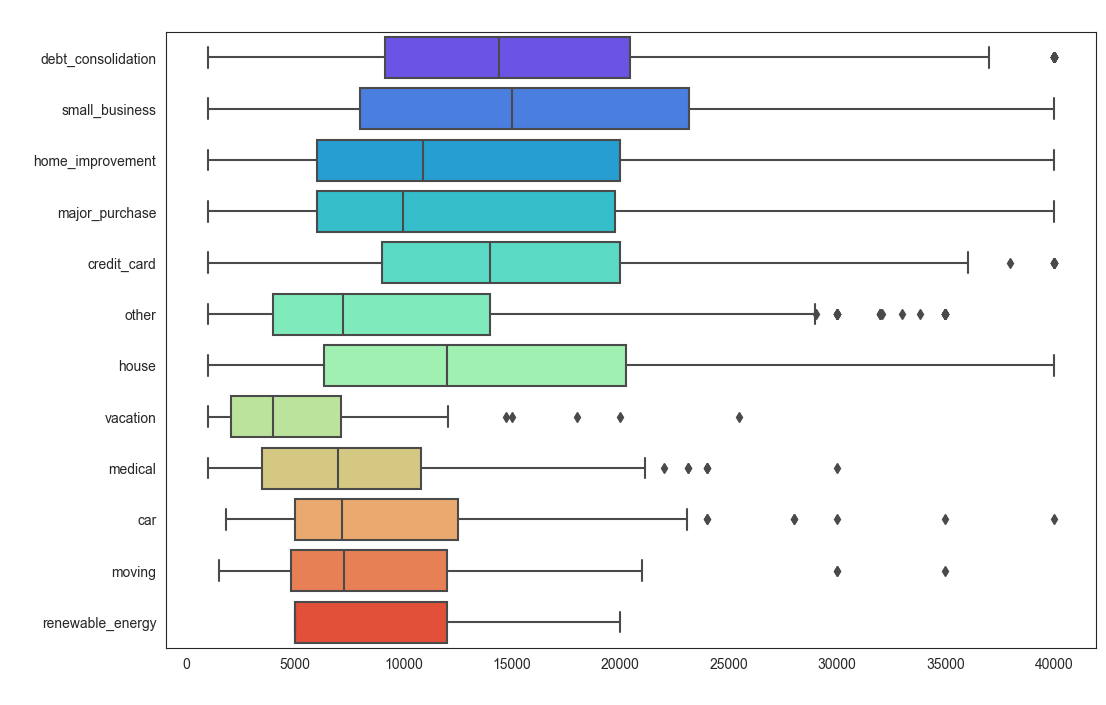

In [47]:
plt.figure(figsize=(12,8),facecolor='w')
ax=sns.boxplot(y='purpose',x='loan_amnt',data=loan_df,palette='rainbow')
ax.set_title('Purpose of Loan vs Loan Amount',fontsize=14,color='w')
ax.set_xlabel('Purpose of Loan',fontsize=14,color='w')
ax.set_ylabel('Loan Amount',fontsize=14,color='w')
plt.show()


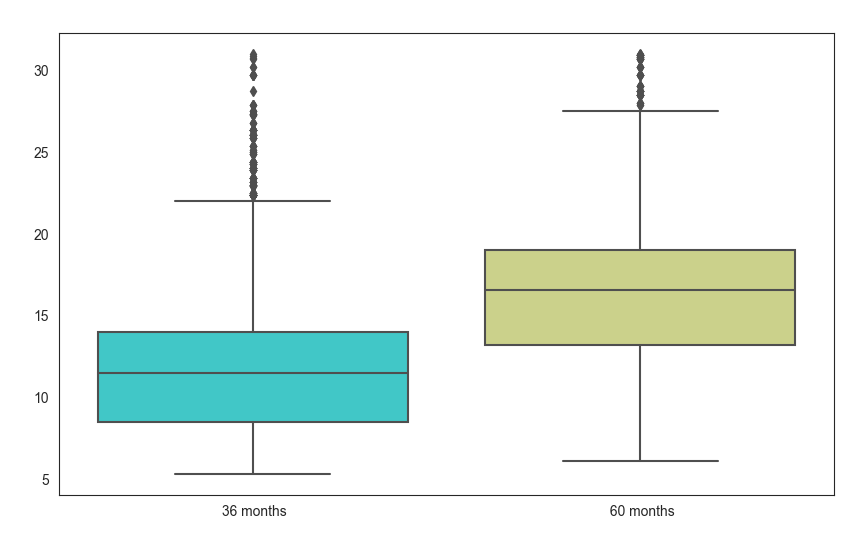

In [48]:
plt.figure(figsize=(10,6),facecolor='w')
ax=sns.boxplot(y='int_rate',x='term',data=loan_df,palette='rainbow')
ax.set_title('Term of loan vs Interest Rate',fontsize=15,color='w')
ax.set_xlabel('Interest Rate',fontsize=14,color='w')
ax.set_ylabel('Term of Loan',fontsize=14,color='w')
plt.show()

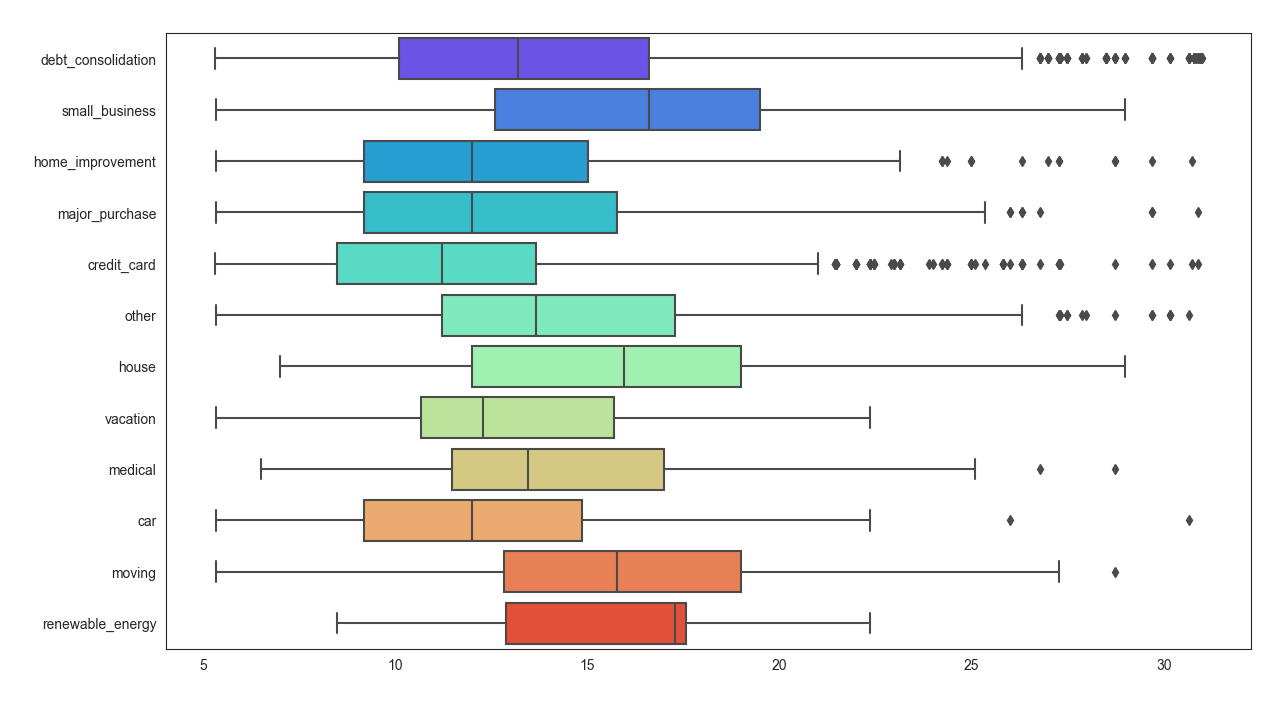

In [49]:
plt.figure(figsize=(14,8),facecolor='w')
ax = sns.boxplot(x='int_rate', y='purpose', data =loan_df,palette='rainbow')
ax.set_title('Purpose vs Interest Rate',fontsize=15,color='w')
ax.set_xlabel('Interest Rate',fontsize=14,color = 'w')
ax.set_ylabel('Purpose of Loan',fontsize=14,color = 'w')
plt.show()


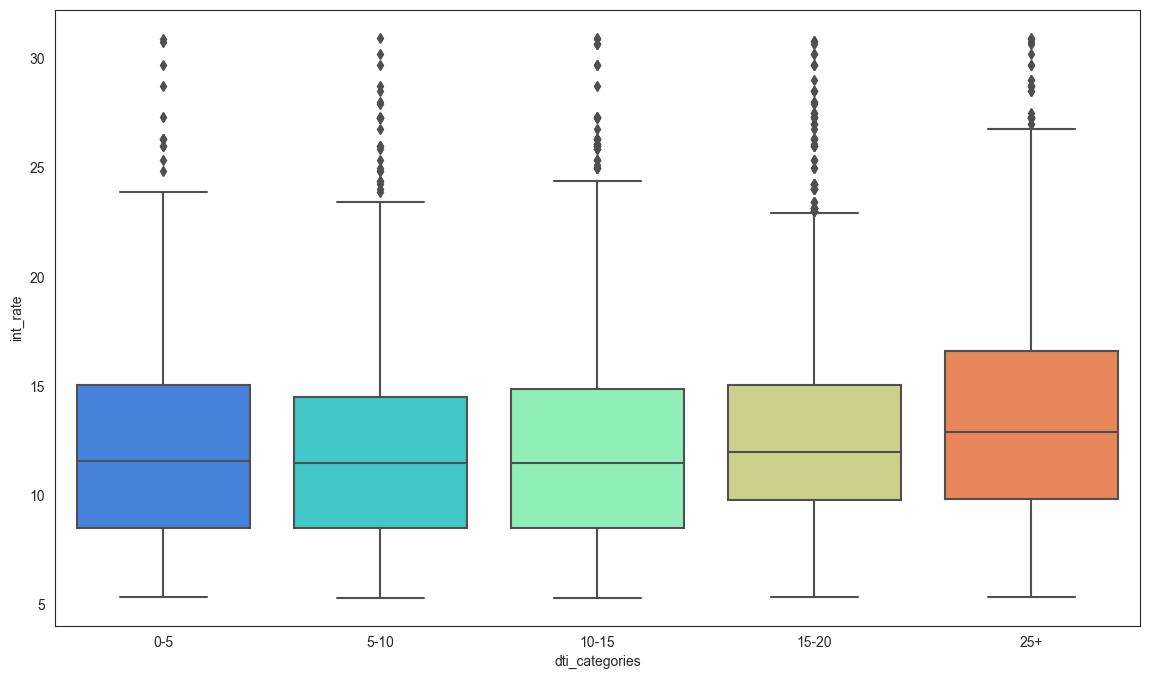

In [50]:
# Box Plot


plt.figure(figsize=(14,8),facecolor='w')
abx = sns.boxplot(y='int_rate', x='dti_categories', data =loan_df,palette='rainbow')
ax.set_title('Debt to income Ratio vs Interest Rate',fontsize=15,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Debt to income Ratio',fontsize=14,color = 'w')
plt.show()

In [51]:
# Filter the DataFrame to only include rows with loan_status 'Fully Paid' or 'Charged Off'
filtered_loan_df = loan_df[loan_df['loan_status'].isin(['Fully Paid', 'Charged Off'])]


**Data Preprocessing and Transformation**

In [52]:
def auto_eda(df, target_column=None, flag=False, datetime_col=None):
    """
    Perform automated exploratory data analysis on a given DataFrame.

    Args:
        df (pd.DataFrame): Input DataFrame
        target_column (str, optional): Name of the target column. Defaults to None.
        flag (bool, optional): If True, process as time series data. Defaults to False.
        datetime_col (str, optional): Name of the datetime column. Defaults to None.

    Returns:
        pd.DataFrame or tuple: Cleaned DataFrame and fairness DataFrame if applicable
    """

    target_data = None
    # 1. Remove duplicates
    df = df.drop_duplicates().reset_index(drop=True)

    # 2. Drop constant columns
    df = df.loc[:, (df != df.iloc[0]).any()].reset_index(drop=True)

    # 3. Extract and Remove date columns
    final_datetime_df = pd.DataFrame()
    fairness_df = pd.DataFrame()

    if flag:
        if datetime_col is None or datetime_col not in df.columns:
            return pd.DataFrame()

        try:
            date_time_data_frame = pd.to_datetime(df[datetime_col], errors='coerce').to_frame()
        except Exception as e:
            print(f"Error converting to datetime: {e}")
            return pd.DataFrame()

        date_time_data_frame[datetime_col] = date_time_data_frame[datetime_col].fillna(method='ffill').interpolate(method='linear')

        date_time_data_frame[f'{datetime_col}_day'] = date_time_data_frame[datetime_col].dt.day
        date_time_data_frame[f'{datetime_col}_month'] = date_time_data_frame[datetime_col].dt.month
        date_time_data_frame[f'{datetime_col}_year'] = date_time_data_frame[datetime_col].dt.year

        date_time_data_frame[f'{datetime_col}_datetime'] = date_time_data_frame.apply(
            lambda row: f"{int(row[f'{datetime_col}_day']):02d}-{int(row[f'{datetime_col}_month']):02d}-{int(row[f'{datetime_col}_year'])}",
            axis=1
        )

        final_datetime_df = date_time_data_frame[[f'{datetime_col}_datetime']].reset_index(drop=True)

    final_datetime_df_2 = pd.DataFrame()
    date_cols = df.select_dtypes(include=['datetime64[ns]', 'datetime']).columns

    if len(date_cols) > 0:
        final_datetime_df_2 = df[date_cols].copy()
        for data_col in date_cols:
            final_datetime_df_2[data_col] = final_datetime_df_2[data_col].fillna(method='ffill').fillna(method='bfill').interpolate(method='linear')
            final_datetime_df_2[data_col] = pd.to_datetime(final_datetime_df_2[data_col], errors='coerce')

            first_valid_date = final_datetime_df_2[data_col].min()
            final_datetime_df_2[data_col].fillna(first_valid_date, inplace=True)

            final_datetime_df_2[f'{data_col}_day'] = final_datetime_df_2[data_col].dt.day
            final_datetime_df_2[f'{data_col}_month'] = final_datetime_df_2[data_col].dt.month
            final_datetime_df_2[f'{data_col}_year'] = final_datetime_df_2[data_col].dt.year

        final_datetime_df_2 = final_datetime_df_2.astype(object)

    # 4. Remove outliers (using IQR method for numerical columns)
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    for col in numeric_columns:
        Q1 = df[col].quantile(0.05)
        Q3 = df[col].quantile(0.95)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)].reset_index(drop=True)

    # 5. Handle missing numerical values
    numerical_imputer = SimpleImputer(strategy='mean')
    df[numeric_columns] = numerical_imputer.fit_transform(df[numeric_columns])
    # Update numeric_columns after dropping correlated features
    numeric_columns = df.select_dtypes(include=[np.number]).columns

    # Handle target column
    # Handle target column
    # Move the target_data initialization earlier in the function, right after handling the target column
   # Inside auto_eda function, modify the target column handling section:
    if target_column is not None and target_column in df.columns:
        df = df[df[target_column].isin(['Fully Paid', 'Charged Off'])].reset_index(drop=True)
        
        target_mapping = {
            'Fully Paid': 1,
            'Charged Off': 0
        }
        
        df[target_column] = df[target_column].map(target_mapping)
        target_data = df[target_column].copy()

        # Select numeric columns from the DataFrame for further processing
        numeric_columns = df.select_dtypes(include=[np.number]).columns

    # 6. Remove highly correlated features
    correlation_matrix = df[numeric_columns].corr().abs()
    upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
    df = df.drop(columns=to_drop).reset_index(drop=True)

    # 7. Handle skewness using Box-Cox Transformation
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    
    for col in numeric_columns:
        if col in df.columns:
            skewness = stats.skew(df[col])
            if skewness > 0.5:
                if (df[col] <= 0).any():
                    df[col] = df[col] - df[col].min() + 1
                df[col], _ = boxcox(df[col])

    # 8. Data normalization using MinMaxScaler
    scaler = MinMaxScaler()
    normalized_df = pd.DataFrame(scaler.fit_transform(df[numeric_columns]), columns=numeric_columns)

    # 9. Handle missing categorical values
    if not final_datetime_df_2.empty and not flag:
        df = df.join(final_datetime_df_2, how='inner', lsuffix='_left', rsuffix='_right').reset_index(drop=True)

    categorical_columns = df.select_dtypes(include=['object', 'category']).columns

    # 10. Dropping categorical columns with unique values greater than 10
    for col in df.select_dtypes(include=['object']).columns:
        if df[col].nunique() > 10:
            df.drop(columns=col, inplace=True)
            
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns
    
    # Check if there are any categorical columns to process
    if len(categorical_columns) > 0:
        # Initialize a SimpleImputer to fill missing values with the most frequent value
        categorical_imputer = SimpleImputer(strategy='most_frequent')
        # Apply the imputer to the categorical columns
        df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])
        # Create a DataFrame for the imputed categorical columns
        categorical_df = df[categorical_columns].reset_index(drop=True)
    
        # Initialize a list to hold encoded DataFrames
        encoded_dfs = []
        # Loop through each categorical column for encoding
        for col in categorical_columns:
            # Check if the column has 2 or fewer unique values
            if df[col].nunique() <= 2:
                # Initialize a LabelEncoder for binary encoding
                label_encoder = LabelEncoder()
                # Fit and transform the column, replacing it with encoded values
                df[col] = label_encoder.fit_transform(df[col])
                # Append the encoded column to the list
                encoded_dfs.append(df[[col]])
            else:
                # For columns with more than 2 unique values, use one-hot encoding
                one_hot_encoded = pd.get_dummies(df[col], prefix=col, drop_first=True).astype(int)
                # Append the one-hot encoded DataFrame to the list
                encoded_dfs.append(one_hot_encoded)
    
        # Concatenate all encoded DataFrames into a single DataFrame
        encoded_df = pd.concat(encoded_dfs, axis=1).reset_index(drop=True)
    
        # Join the normalized DataFrame with the encoded DataFrame
        joined_df = pd.concat([normalized_df.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)
    
        # If a target column is specified, create a fairness DataFrame
        if target_column is not None:
            fairness_df = pd.concat([normalized_df, categorical_df], axis=1).reset_index(drop=True)
        else:
            # If no target column is specified, set joined_df to normalized_df
            joined_df = normalized_df

    # If a target column is specified, ensure fairness_df is set to normalized_df
    if target_column is not None:
        fairness_df = normalized_df



    if target_data is not None:
        joined_df[target_column] = target_data
    joined_df.to_csv("cleaned_churn_data.csv", index=False)

    # 12. Concatenate cleaned_df with final_datetime_df if flag is True
    # Check if the flag is set for time series processing and if the final_datetime_df is not empty
    if flag and not final_datetime_df.empty:
        # Join the joined DataFrame with the final datetime DataFrame using an inner join
        timeseries_df = joined_df.join(final_datetime_df, how='inner').reset_index(drop=True)
        # Return the resulting time series DataFrame
        return timeseries_df
    else:
        # If a target column is specified
        if target_column is not None:
            # Return the joined DataFrame and the fairness DataFrame, both with reset indices
            return joined_df.reset_index(drop=True), fairness_df.reset_index(drop=True)
        else:
            # If no target column is specified, return only the joined DataFrame with reset index
            return joined_df.reset_index(drop=True)


def data_read(df, target_column=None, flag=False, datetime_col=None):
    if flag:
        timeseries_df = auto_eda(df, target_column, flag, datetime_col=datetime_col)
        return timeseries_df
    else:
        result = auto_eda(df, target_column, flag, datetime_col=datetime_col)
        if isinstance(result, tuple):
            joined_df, fairness_df = result
            joined_df.to_csv("cleaned_data.csv", index=False)
            return joined_df, fairness_df
        else:
            joined_df = result
            
            return joined_df

In [53]:
# run the file
cleaned_data,fairness_data = data_read(filtered_loan_df, target_column="Loan_Status")
cleaned_data.head(10)

,loan_amnt,int_rate,annual_inc,dti,term,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,issue_d_Dec-15,issue_d_Jul-18,issue_d_Jun-17,loan_status,initial_list_status,application_type,pub_rec_bankruptcies_1,pub_rec_bankruptcies_2,pub_rec_bankruptcies_3,pub_rec_bankruptcies_4,pub_rec_bankruptcies_6,pub_rec_bankruptcies_8,loan_amnt_categories_14000-21000,loan_amnt_categories_21000-28000,loan_amnt_categories_28000+,loan_amnt_categories_7000-14000,annual_inc_categories_20000-40000,annual_inc_categories_40000-60000,annual_inc_categories_60000-80000,annual_inc_categories_80000+,interest_rate_categories_10-13,interest_rate_categories_12.5-16,interest_rate_categories_16+,dti_categories_10-15,dti_categories_15-20,dti_categories_25+,dti_categories_5-10,issue_month_Dec,issue_month_Jul,issue_month_Jun,issue_year_2017,issue_year_2018
0,0.199721,0.500061,0.507943,0.079607,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0
1,0.773760,0.412985,0.551974,0.216325,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0
2,0.687506,0.354671,0.543702,0.145205,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0
3,0.461757,0.786564,0.679425,0.341730,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
4,0.504955,0.477132,0.383649,0.137392,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0
5,0.687506,0.268622,0.830382,0.197602,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
6,0.687506,0.228719,0.623628,0.237204,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
7,0.449985,0.094864,0.623628,0.176051,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
8,0.386380,0.388990,0.437807,0.468750,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0
9,0.043088,0.453026,0.547869,0.470770,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0


In [54]:
def prepare_data_with_pca(cleaned_data, target_column, n_components=None):
    # Separate features and target
    X = cleaned_data.drop(target_column, axis=1)
    y = cleaned_data[target_column]
    
    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Apply PCA
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)
    
    # Convert to DataFrame with meaningful column names
    pca_columns = [f'PC{i+1}' for i in range(X_pca.shape[1])]
    X_pca_df = pd.DataFrame(X_pca, columns=pca_columns)
    
    # Print explained variance ratio
    explained_variance = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance)
    print(f"Explained variance ratio by components: {explained_variance}")
    print(f"Cumulative explained variance ratio: {cumulative_variance}")
    
    return X_pca_df, y, pca


In [55]:
# Apply PCA and get transformed data
X_pca, y, pca = prepare_data_with_pca(cleaned_data, 
                                     target_column='loan_status',
                                     n_components=0.95)  # Keep 95% of variance

Explained variance ratio by components: [0.10254477 0.07299805 0.07085329 0.06731061 0.04671955 0.04315702
 0.03360711 0.03258838 0.03131781 0.02844789 0.02803379 0.02697937
 0.02629734 0.0257832  0.02511843 0.02406283 0.02334905 0.02298149
 0.02240555 0.02160232 0.02141033 0.02112965 0.02093497 0.02057981
 0.01991785 0.01898685 0.01865718 0.01728835 0.01536019]
Cumulative explained variance ratio: [0.10254477 0.17554282 0.24639612 0.31370673 0.36042628 0.40358329
 0.4371904  0.46977877 0.50109658 0.52954447 0.55757826 0.58455762
 0.61085497 0.63663816 0.66175659 0.68581942 0.70916847 0.73214996
 0.75455551 0.77615783 0.79756816 0.81869781 0.83963278 0.86021259
 0.88013044 0.8991173  0.91777447 0.93506282 0.95042301]


In [56]:
# loanstatus_0 = cleaned_data[cleaned_data["loan_status"]==0]
# loanstatus_1 = cleaned_data[cleaned_data["loan_status"]==1]
# subset_of_loanstatus_0 = loanstatus_0.sample(n=100)
# subset_of_loanstatus_1 = loanstatus_1.sample(n=100)
# data_clean = pd.concat([subset_of_loanstatus_1, subset_of_loanstatus_0])
# data_clean = data_clean.sample(frac=1).reset_index(drop=True)
# print("Current shape of dataset :",data_clean.shape)
# data_clean.head()

In [57]:

# X = data_clean.drop(columns=['loan_status'])  # Features
# y = data_clean['loan_status']                  # Target variable

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Model Building and Model Evaluation**

In [58]:
class ModelEvaluator:
    def __init__(self, X, y, test_size=0.2, random_state=42):
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X, y, test_size=test_size, random_state=random_state
        )
        self.models = {}
        self.results = {}
        self.predictions = {}
        self.probabilities = {}
        
    def setup_models(self):
        # Random Forest
        rf_params = {
            'n_estimators': [100, 200, 300, 400, 500],
            'max_features': [ 'sqrt', 'log2'],
            'max_depth': [None, 10, 20, 30, 40, 50],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'bootstrap': [True, False]
        }
        self.models['Random Forest'] = (
            RandomForestClassifier(random_state=42),
            rf_params
        )

        # Logistic Regression
        lr_params = {
            'C': np.logspace(-4, 4, 20),
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear', 'saga'],
            'max_iter': [100, 200, 300, 400, 500]
        }
        self.models['Logistic Regression'] = (
            LogisticRegression(random_state=42),
            lr_params
        )
        #  # K-Nearest Neighbors
        # knn_params = {
        #     'n_neighbors': [3, 5, 7, 9, 11],
        #     'weights': ['uniform', 'distance'],
        #     'metric': ['euclidean', 'manhattan', 'minkowski']
        # }
        # self.models['KNN'] = (
        #     KNeighborsClassifier(),
        #     knn_params
        # )
        
        # # Support Vector Machine
        # svm_params = {
        #     'C': [0.1, 1, 10, 100],
        #     'kernel': ['linear', 'rbf', 'poly'],
        #     'gamma': ['scale', 'auto']
        # }
        # self.models['SVM'] = (
        #     SVC(probability=True, random_state=42),
        #     svm_params
        # )


        # Decision Tree
        dt_params = {
            'max_depth': [None, 10, 20, 30, 40, 50],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'criterion': ['gini', 'entropy']
        }
        self.models['Decision Tree'] = (
            DecisionTreeClassifier(random_state=42),
            dt_params
        )

        # Bagging
        bag_params = {
            'n_estimators': [10, 20, 30, 40, 50],
            'max_samples': [0.5, 0.7, 1.0],
            'max_features': [0.5, 0.7, 1.0],
            'bootstrap': [True, False],
            'bootstrap_features': [True, False]
        }
        self.models['Bagging'] = (
            BaggingClassifier(random_state=42),
            bag_params
        )

        # XGBoost
        xgb_params = {
            'n_estimators': [100, 200, 300, 400, 500],
            'max_depth': [3, 4, 5, 6, 7],
            'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
            'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
            'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
            'min_child_weight': [1, 3, 5, 7],
            'gamma': [0, 0.1, 0.2, 0.3, 0.4]
        }
        self.models['XGBoost'] = (
            xgb.XGBClassifier(random_state=42),
            xgb_params
        )

    def plot_confusion_matrix(self, y_true, y_pred, title):
        plt.figure(figsize=(8, 6))
        cm = confusion_matrix(y_true, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix - {title}')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.show()
        
    def plot_roc_curves(self):
        plt.figure(figsize=(10, 8))
        
        for name in self.probabilities.keys():
            fpr, tpr, _ = roc_curve(self.y_test, self.probabilities[name])
            roc_auc = roc_auc_score(self.y_test, self.probabilities[name])
            plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})')
        
        plt.plot([0, 1], [0, 1], 'k--', label='Random')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curves Comparison')
        plt.legend(loc='lower right')
        plt.grid(True)
        plt.show()

    def create_comparison_table(self):
        comparison_data = []
        
        for name in self.results.keys():
            model_metrics = {
                'Model': name,
                'Accuracy': self.results[name]['Accuracy'],
                'ROC AUC': self.results[name]['ROC AUC'],
                'Precision': self.results[name]['Precision'],
                'Recall': self.results[name]['Recall'],
                'F1 Score': self.results[name]['F1 Score']
            }
            comparison_data.append(model_metrics)
        
        comparison_df = pd.DataFrame(comparison_data)
        comparison_df.set_index('Model', inplace=True)
        
        # Add ranking
        for column in comparison_df.columns:
            comparison_df[f'{column} Rank'] = comparison_df[column].rank(ascending=False)
        
        # Calculate average rank
        rank_columns = [col for col in comparison_df.columns if 'Rank' in col]
        comparison_df['Average Rank'] = comparison_df[rank_columns].mean(axis=1)
        
        # Sort by average rank
        comparison_df.sort_values('Average Rank', inplace=True)
        
        # Format metrics to 4 decimal places
        metric_columns = ['Accuracy', 'ROC AUC', 'Precision', 'Recall', 'F1 Score']
        comparison_df[metric_columns] = comparison_df[metric_columns].round(4)
        
        return comparison_df

    def train_and_evaluate(self, n_iter=100, cv=5):
        for name, (model, params) in self.models.items():
            print(f"\nTraining {name}...")
            
            # Hyperparameter tuning
            random_search = RandomizedSearchCV(
                model,
                params,
                n_iter=n_iter,
                cv=cv,
                scoring='accuracy',
                random_state=42,
                n_jobs=-1
            )
            
            # Fit the model
            random_search.fit(self.X_train, self.y_train)
            
            # Get best model
            best_model = random_search.best_estimator_
            
            # Make predictions
            y_pred = best_model.predict(self.X_test)
            y_pred_proba = best_model.predict_proba(self.X_test)[:, 1]
            
            # Store predictions and probabilities
            self.predictions[name] = y_pred
            self.probabilities[name] = y_pred_proba
            
            # Calculate metrics
            self.results[name] = {
                'Best Parameters': random_search.best_params_,
                'Best CV Score': random_search.best_score_,
                'Accuracy': accuracy_score(self.y_test, y_pred),
                'ROC AUC': roc_auc_score(self.y_test, y_pred_proba),
                'Precision': precision_score(self.y_test, y_pred),
                'Recall': recall_score(self.y_test, y_pred),
                'F1 Score': f1_score(self.y_test, y_pred)
            }
            
            # Plot confusion matrix
            self.plot_confusion_matrix(self.y_test, y_pred, name)
            
            # Print classification report
            print(f"\nClassification Report for {name}:")
            print(classification_report(self.y_test, y_pred))
    
    def display_results(self):
        # Plot ROC curves
        self.plot_roc_curves()
        
        # Create and display comparison table
        comparison_df = self.create_comparison_table()
        
        print("\nModel Performance Comparison:")
        print(comparison_df)
        
        print("\nBest Parameters for each model:")
        for model, results in self.results.items():
            print(f"\n{model}:")
            print(results['Best Parameters'])


Training Random Forest...


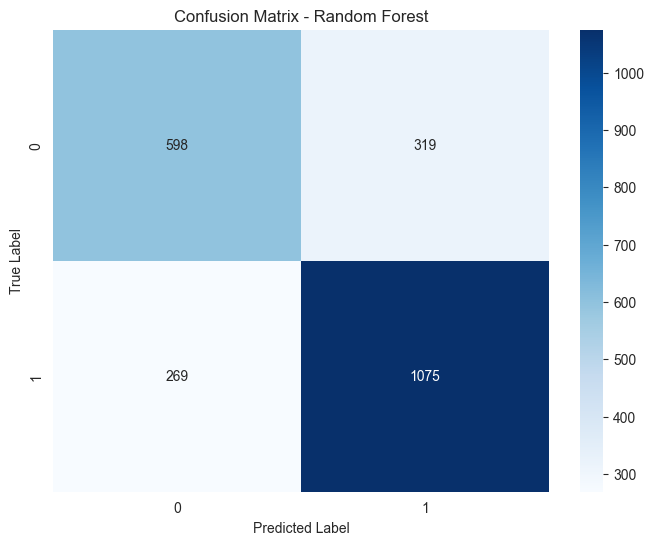


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.69      0.65      0.67       917
           1       0.77      0.80      0.79      1344

    accuracy                           0.74      2261
   macro avg       0.73      0.73      0.73      2261
weighted avg       0.74      0.74      0.74      2261


Training Logistic Regression...


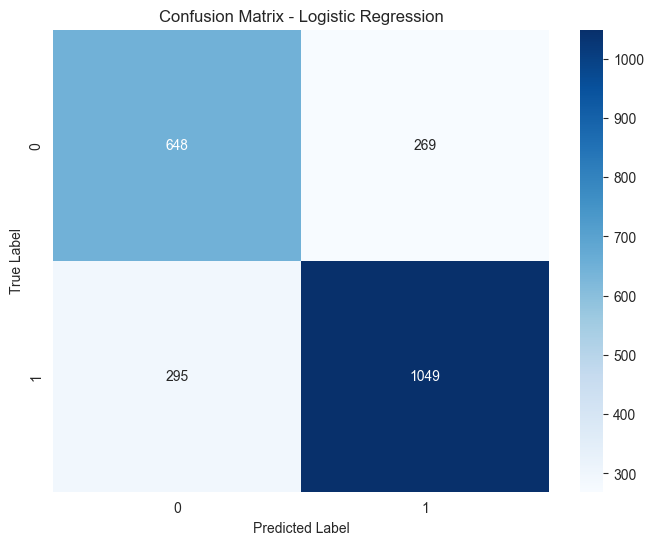


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.69      0.71      0.70       917
           1       0.80      0.78      0.79      1344

    accuracy                           0.75      2261
   macro avg       0.74      0.74      0.74      2261
weighted avg       0.75      0.75      0.75      2261


Training Decision Tree...


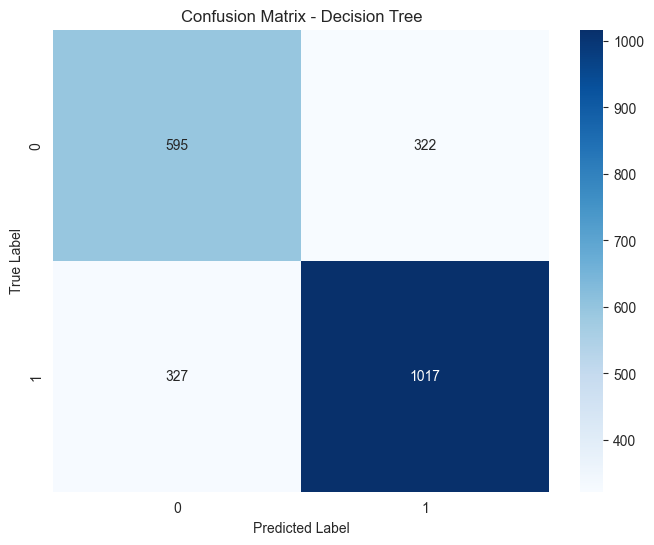


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.65      0.65      0.65       917
           1       0.76      0.76      0.76      1344

    accuracy                           0.71      2261
   macro avg       0.70      0.70      0.70      2261
weighted avg       0.71      0.71      0.71      2261


Training Bagging...


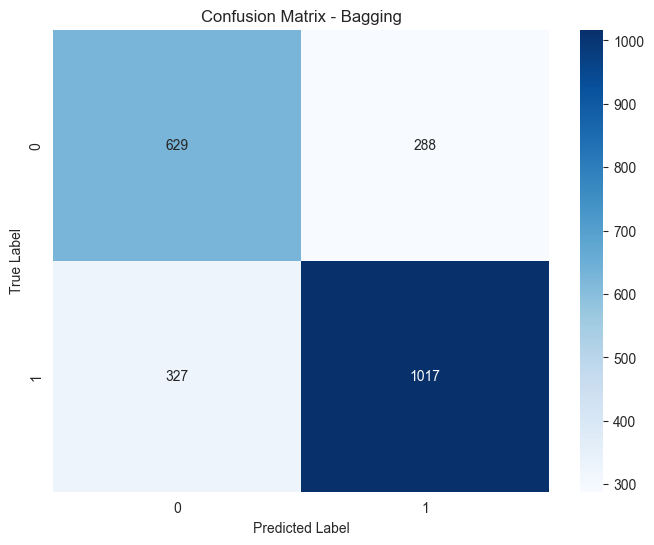


Classification Report for Bagging:
              precision    recall  f1-score   support

           0       0.66      0.69      0.67       917
           1       0.78      0.76      0.77      1344

    accuracy                           0.73      2261
   macro avg       0.72      0.72      0.72      2261
weighted avg       0.73      0.73      0.73      2261


Training XGBoost...


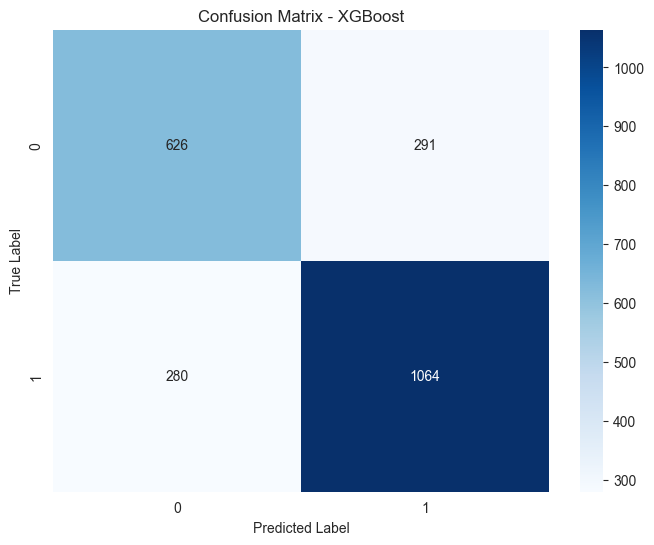


Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.69      0.68      0.69       917
           1       0.79      0.79      0.79      1344

    accuracy                           0.75      2261
   macro avg       0.74      0.74      0.74      2261
weighted avg       0.75      0.75      0.75      2261



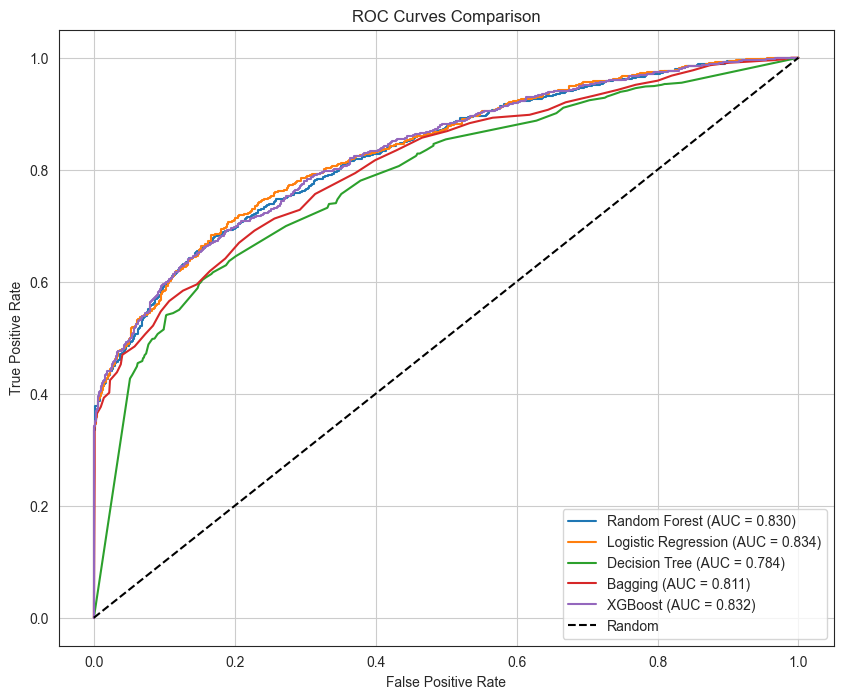


Model Performance Comparison:
                     Accuracy  ROC AUC  Precision  Recall  F1 Score  \
Model                                                                 
Logistic Regression    0.7506   0.8343     0.7959  0.7805    0.7881   
XGBoost                0.7475   0.8324     0.7852  0.7917    0.7884   
Random Forest          0.7399   0.8303     0.7712  0.7999    0.7852   
Bagging                0.7280   0.8113     0.7793  0.7567    0.7678   
Decision Tree          0.7130   0.7840     0.7595  0.7567    0.7581   

                     Accuracy Rank  ROC AUC Rank  Precision Rank  Recall Rank  \
Model                                                                           
Logistic Regression            1.0           1.0             1.0          3.0   
XGBoost                        2.0           2.0             2.0          2.0   
Random Forest                  3.0           3.0             4.0          1.0   
Bagging                        4.0           4.0             3.0  

In [59]:
# Initialize and use ModelEvaluator with PCA-transformed data
evaluator = ModelEvaluator(X_pca, y)
evaluator.setup_models()
evaluator.train_and_evaluate()
evaluator.display_results()


Model Performance Metrics:
                       R2     MSE     MAE    RMSE
Linear Regression  0.9404  0.0024  0.0390  0.0487
Ridge              0.9408  0.0024  0.0387  0.0486
Lasso             -0.0003  0.0399  0.1621  0.1997
ElasticNet        -0.0003  0.0399  0.1621  0.1997
Random Forest      0.9681  0.0013  0.0257  0.0357
XGBoost            0.9664  0.0013  0.0272  0.0366
Gradient Boosting  0.9551  0.0018  0.0285  0.0423

Visualizations for Linear Regression


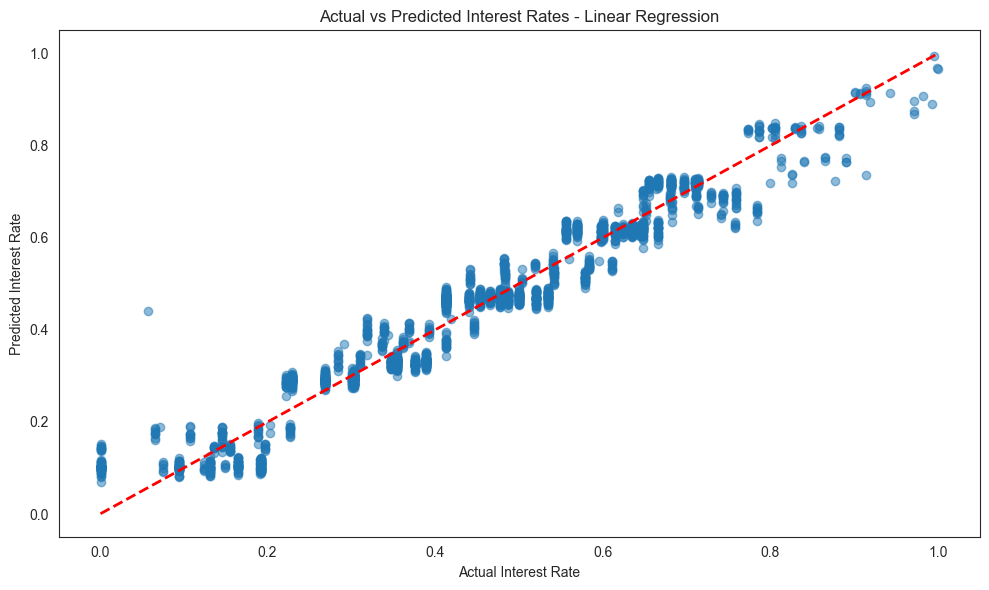

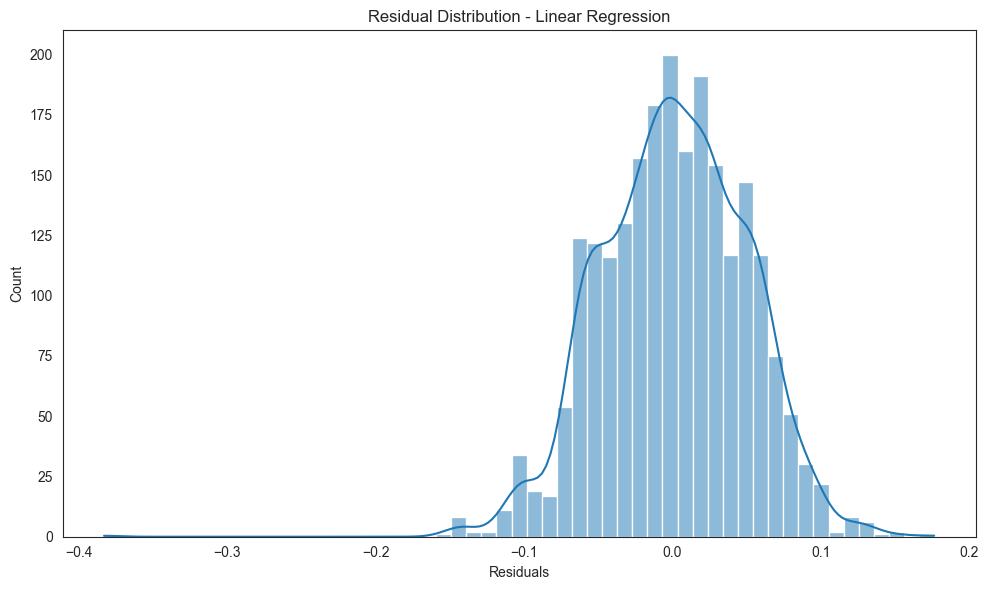


Visualizations for Ridge


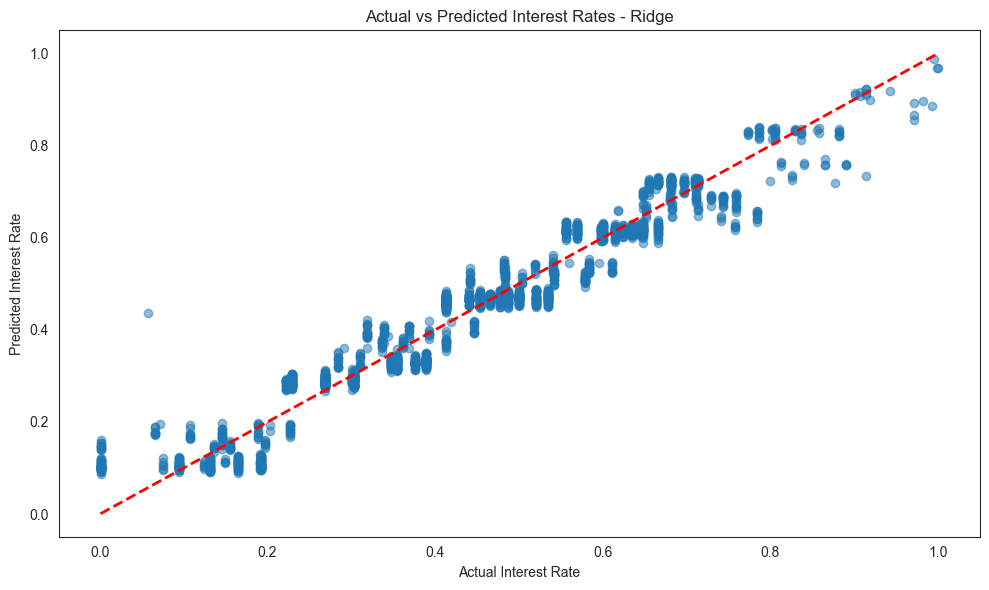

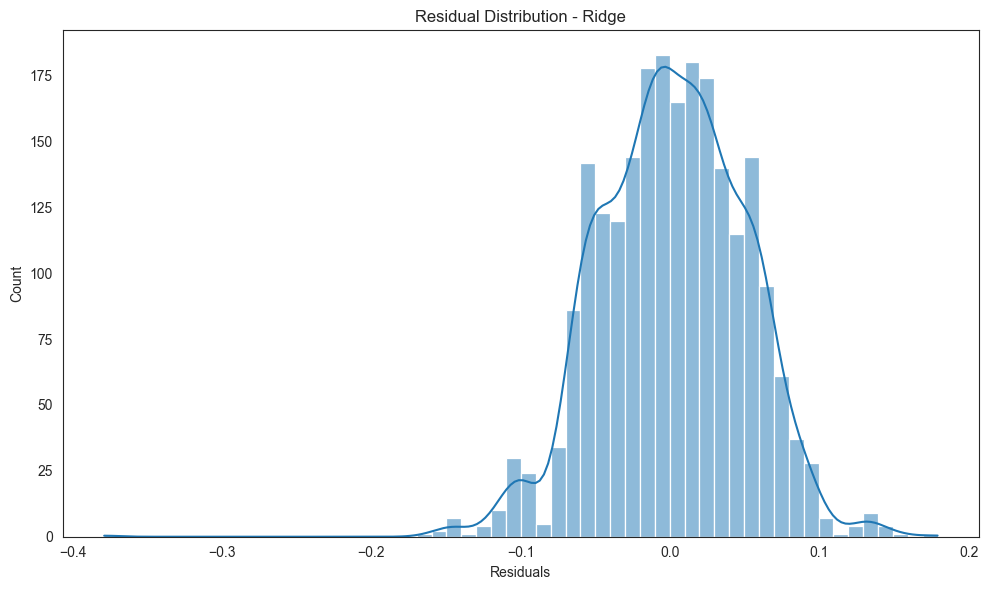


Visualizations for Lasso


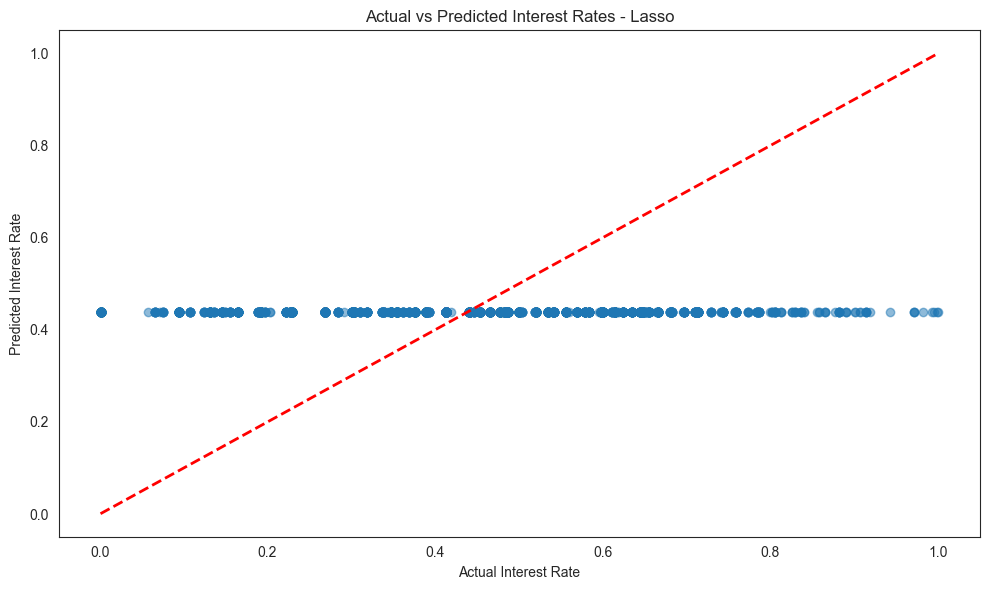

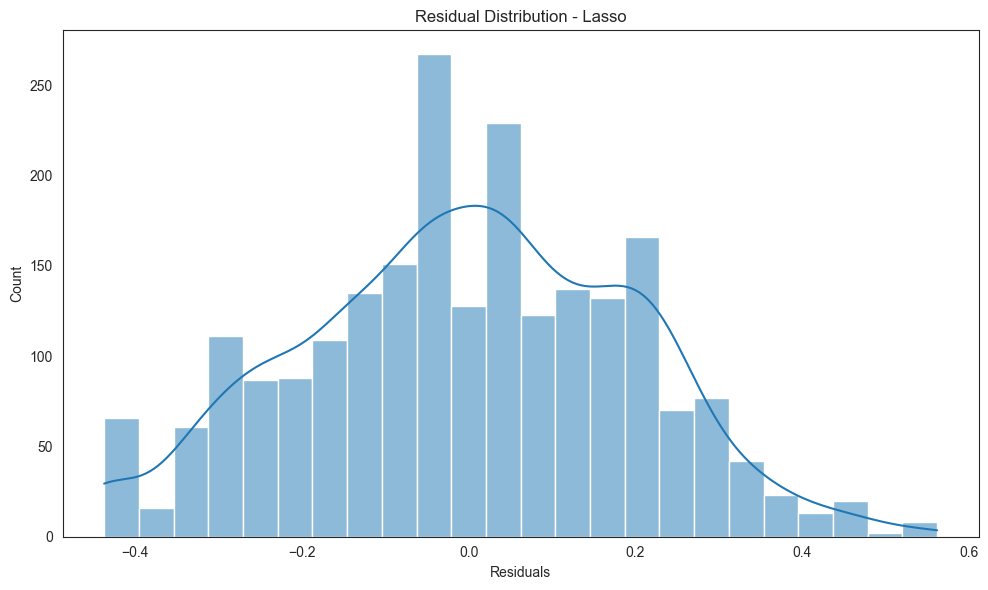


Visualizations for ElasticNet


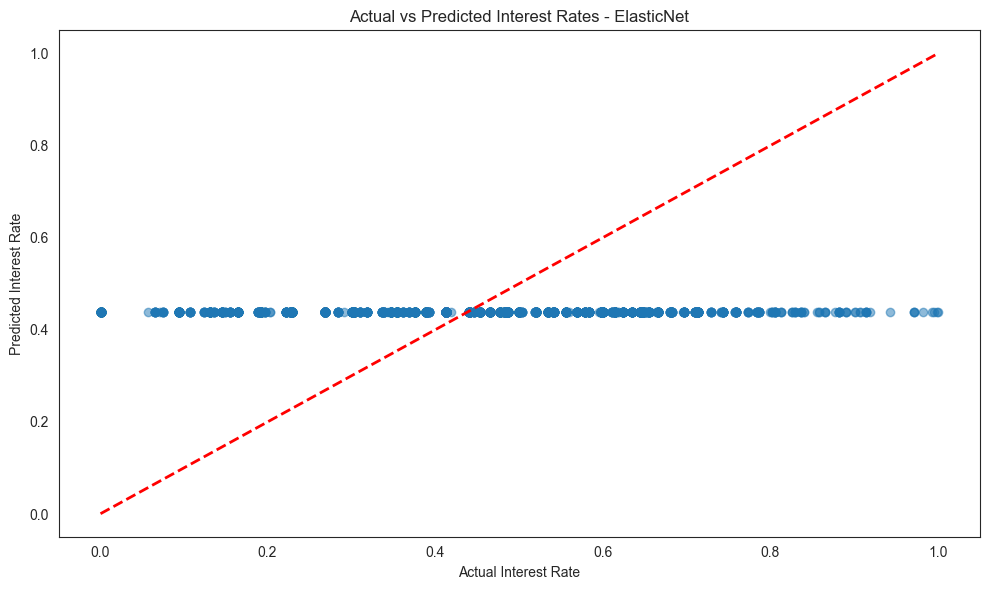

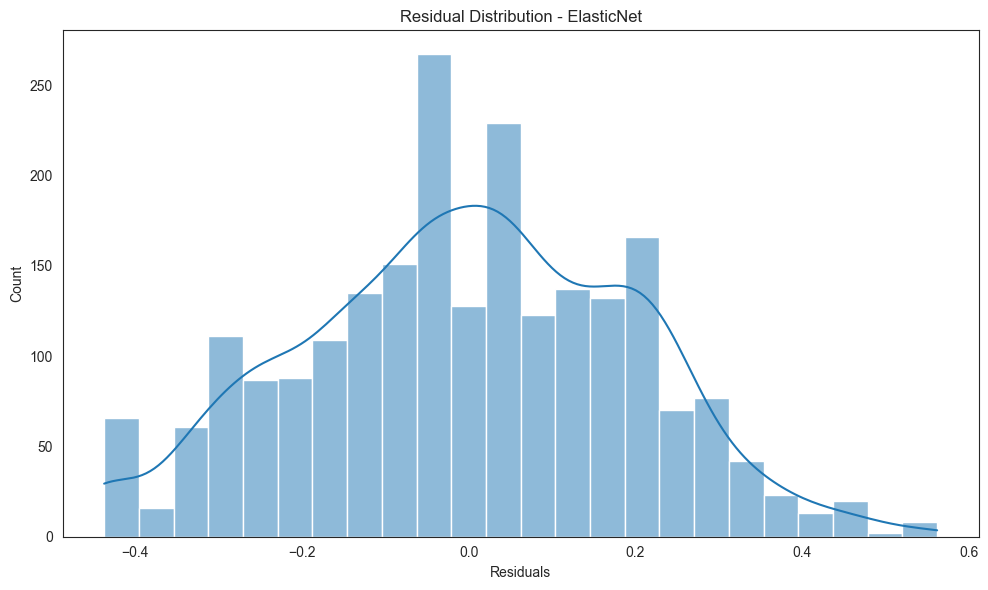


Visualizations for Random Forest


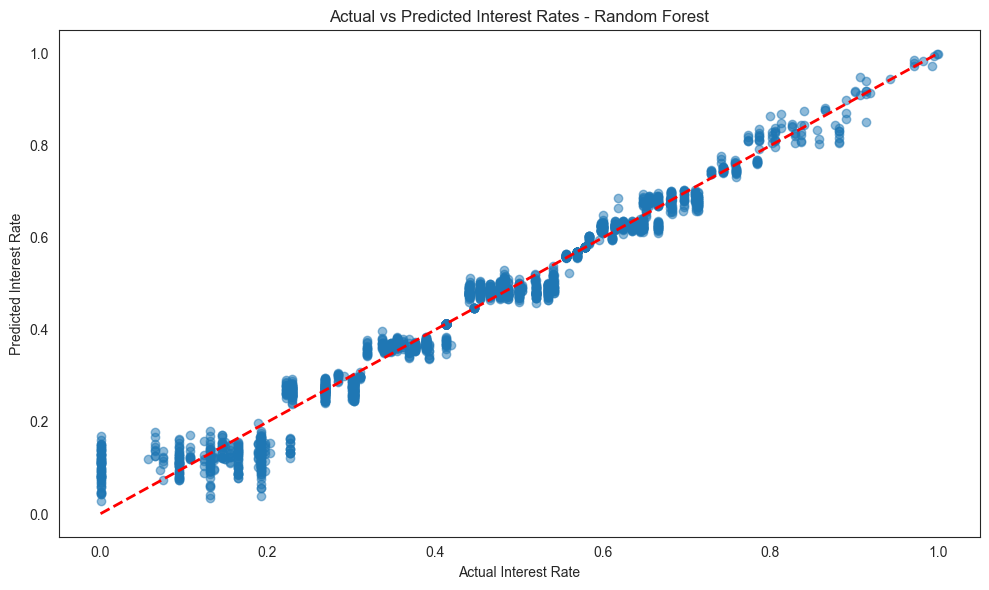

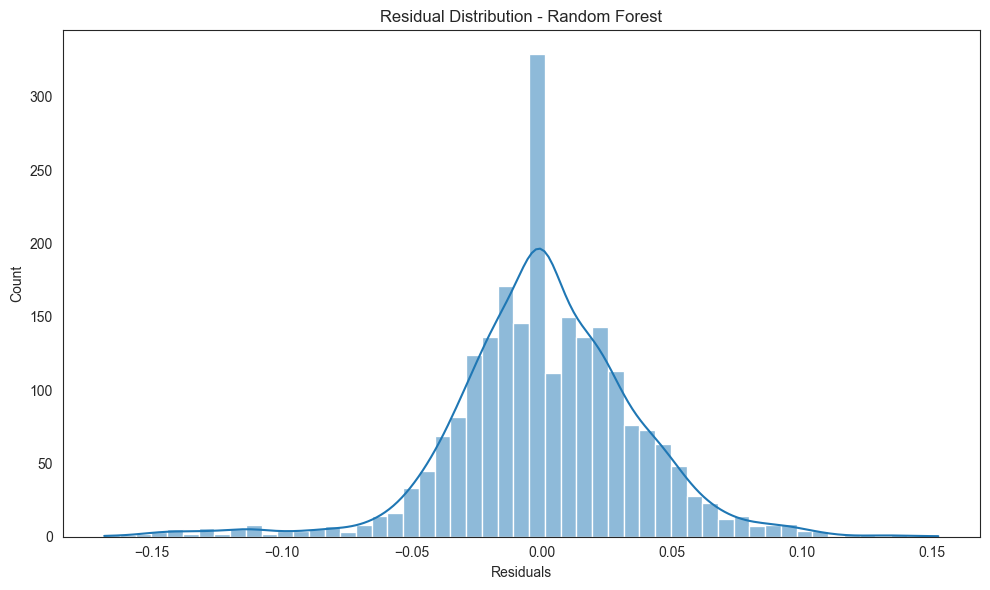

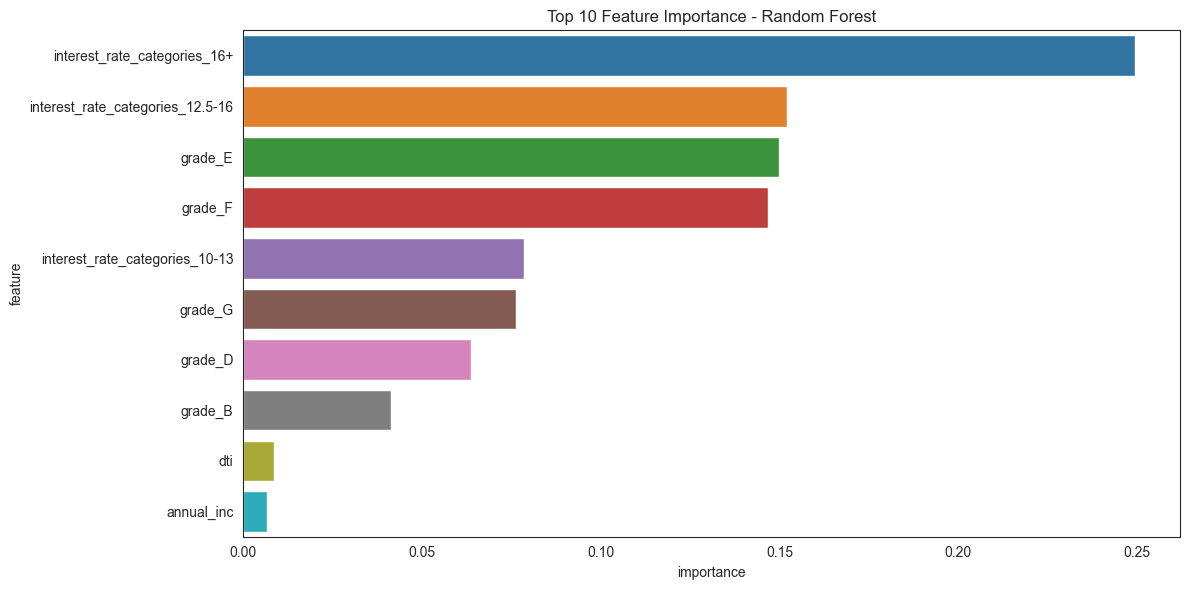


Visualizations for XGBoost


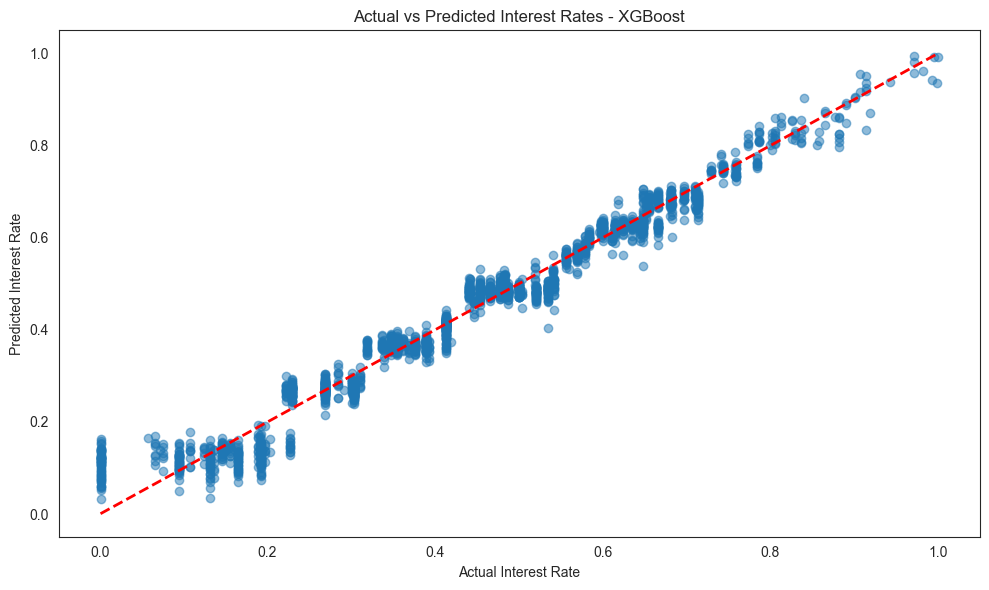

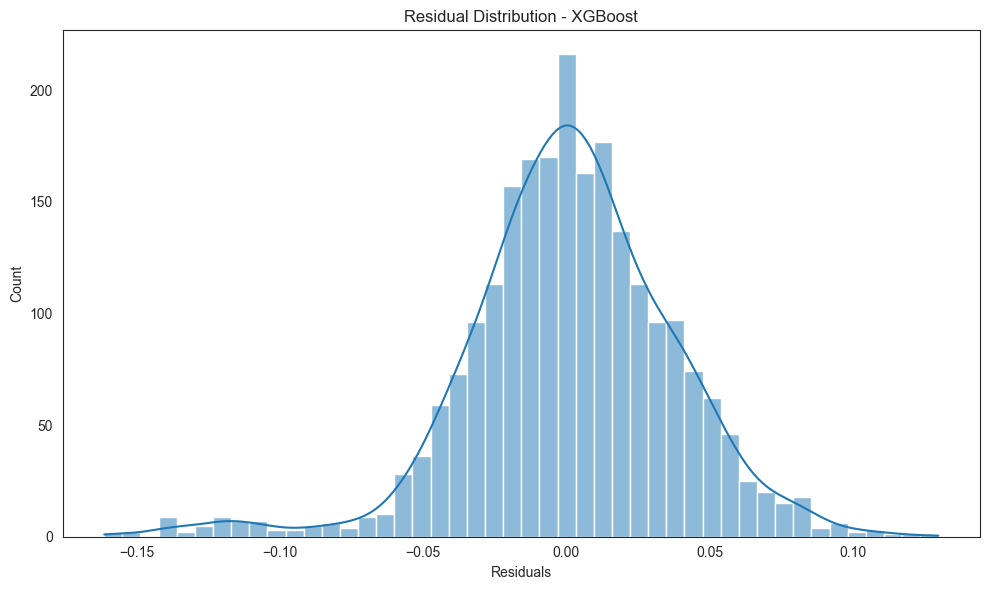

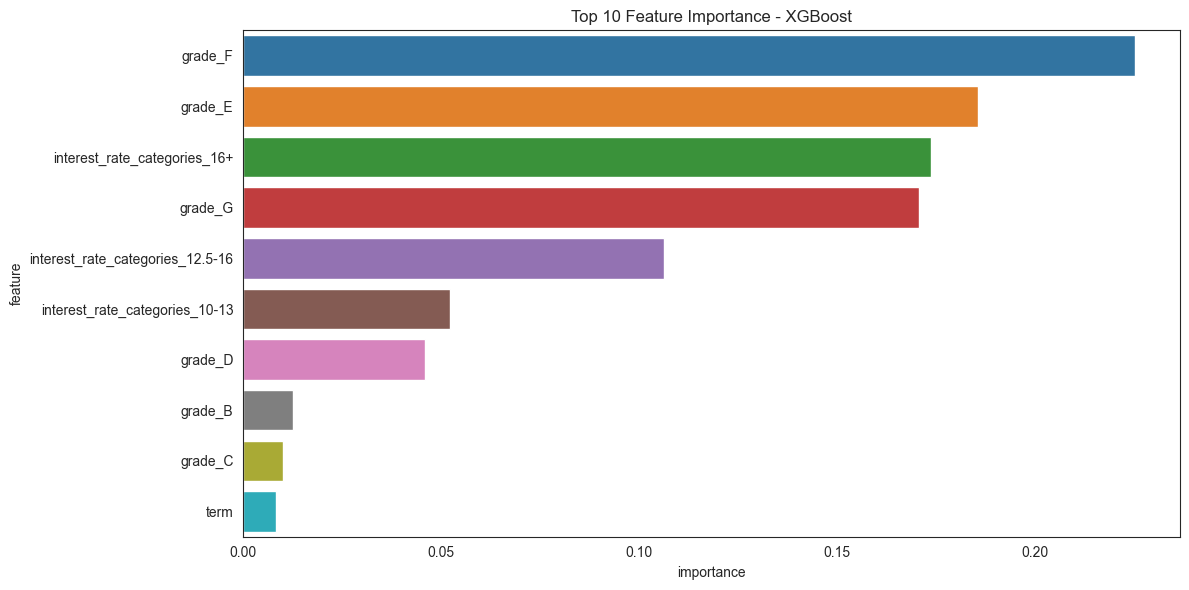


Visualizations for Gradient Boosting


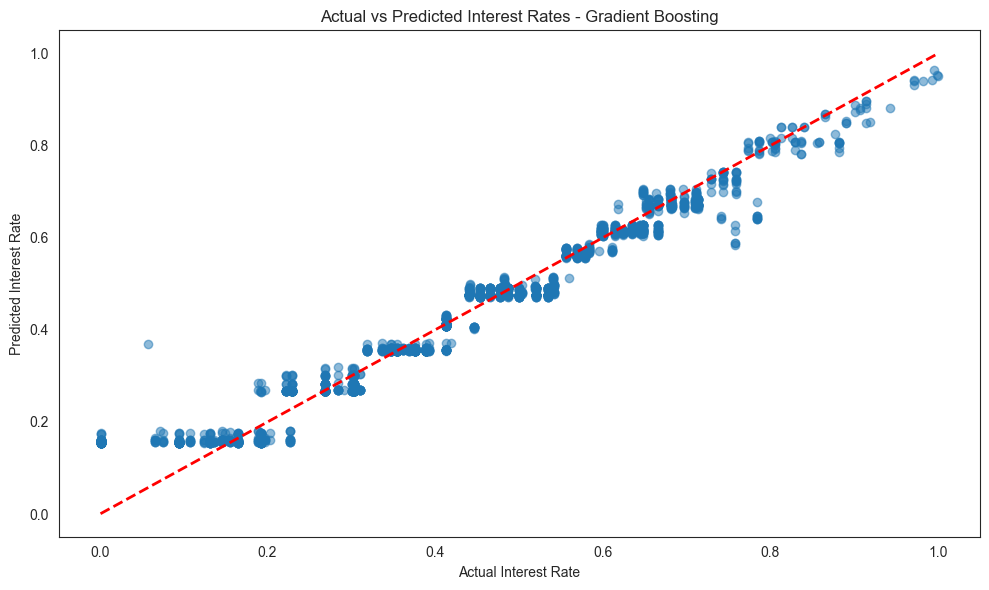

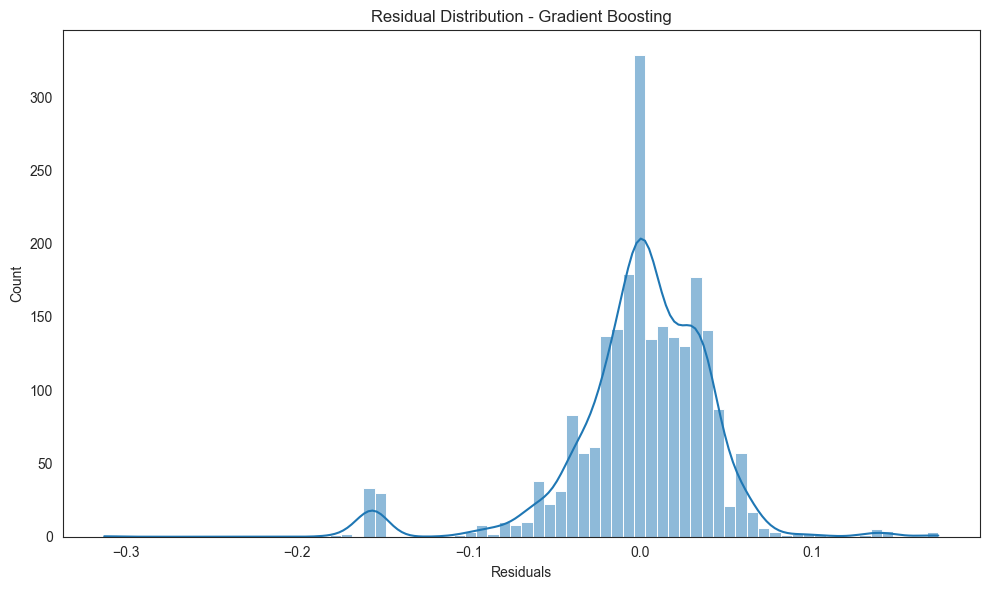

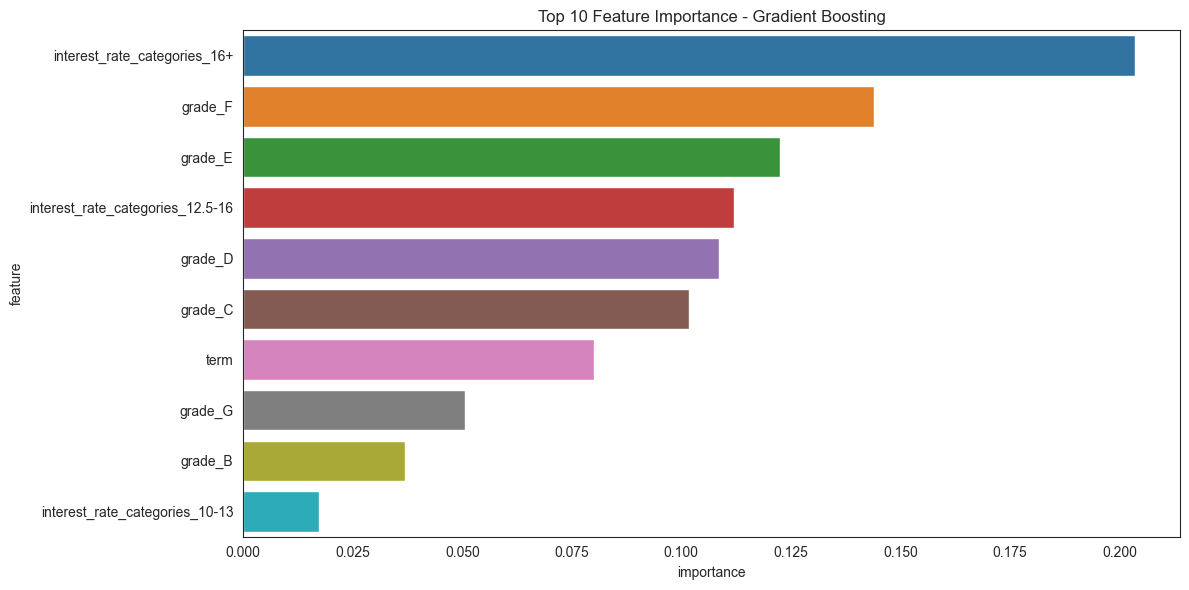

In [ ]:


# Split features and target
X = cleaned_data.drop(['int_rate'], axis=1)
y = cleaned_data['int_rate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'Random Forest': RandomForestRegressor(n_estimators=100),
    'XGBoost': xgb.XGBRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

# Train and evaluate models
results = {}
predictions = {}

for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    predictions[name] = y_pred
    
    # Calculate metrics
    results[name] = {
        'R2': r2_score(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred))
    }

# Create visualization functions
def plot_actual_vs_predicted(y_test, predictions, model_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, predictions, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Interest Rate')
    plt.ylabel('Predicted Interest Rate')
    plt.title(f'Actual vs Predicted Interest Rates - {model_name}')
    plt.tight_layout()
    plt.show()

def plot_residuals(y_test, predictions, model_name):
    residuals = y_test - predictions
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True)
    plt.xlabel('Residuals')
    plt.ylabel('Count')
    plt.title(f'Residual Distribution - {model_name}')
    plt.tight_layout()
    plt.show()

def plot_feature_importance(model, X_train, model_name):
    if hasattr(model, 'feature_importances_'):
        importance = pd.DataFrame({
            'feature': X_train.columns,
            'importance': model.feature_importances_
        }).sort_values('importance', ascending=False)
        
        plt.figure(figsize=(12, 6))
        sns.barplot(x='importance', y='feature', data=importance.head(10))
        plt.title(f'Top 10 Feature Importance - {model_name}')
        plt.tight_layout()
        plt.show()

# Display results and visualizations
print("\nModel Performance Metrics:")
results_df = pd.DataFrame(results).T
print(results_df.round(4))

# Generate visualizations for each model
for name, predictions in predictions.items():
    print(f"\nVisualizations for {name}")
    plot_actual_vs_predicted(y_test, predictions, name)
    plot_residuals(y_test, predictions, name)
    if name in ['Random Forest', 'XGBoost', 'Gradient Boosting']:
        plot_feature_importance(models[name], X_train, name)


In [61]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Set random seed for reproducibility
np.random.seed(42)

# Generate 10000 rows of data
n_rows = 10000

# Create branch IDs (50 different branches)
branch_ids = [f'BR_{str(i).zfill(3)}' for i in range(1, 51)]
branch_types = ['Urban', 'Rural', 'Suburban']
regions = ['North', 'South', 'East', 'West', 'Central']
states = ['State_' + str(i) for i in range(1, 11)]

# Generate base data
data = {
    'Date': pd.date_range(start='2023-01-01', periods=n_rows, freq='D').repeat(1),
    'Branch_ID': np.random.choice(branch_ids, n_rows),
    'Branch_Type': np.random.choice(branch_types, n_rows),
    'Region': np.random.choice(regions, n_rows),
    'State': np.random.choice(states, n_rows),
    'Staff_Count': np.random.randint(5, 50, n_rows),
    'Customer_Footfall': np.random.randint(20, 500, n_rows),
    'Total_Sales': np.random.uniform(10000, 1000000, n_rows),
    'Operating_Costs': np.random.uniform(5000, 500000, n_rows),
    'Marketing_Spend': np.random.uniform(1000, 100000, n_rows),
    'Customer_Satisfaction': np.random.uniform(1, 5, n_rows),
    'Employee_Satisfaction': np.random.uniform(1, 5, n_rows),
    'Inventory_Value': np.random.uniform(50000, 2000000, n_rows),
    'Number_of_Transactions': np.random.randint(10, 300, n_rows),
    'Average_Transaction_Value': np.random.uniform(100, 5000, n_rows),
    'Training_Hours': np.random.randint(0, 40, n_rows),
    'Maintenance_Cost': np.random.uniform(1000, 50000, n_rows),
    'Local_Competition_Count': np.random.randint(0, 15, n_rows)
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Calculate Revenue and Profit
df['Revenue'] = df['Total_Sales']
df['Profit'] = df['Revenue'] - df['Operating_Costs'] - df['Marketing_Spend'] - df['Maintenance_Cost']

# Add some realistic patterns
# More profitable branches tend to have higher customer satisfaction
df.loc[df['Profit'] > df['Profit'].median(), 'Customer_Satisfaction'] += 0.5
df['Customer_Satisfaction'] = df['Customer_Satisfaction'].clip(1, 5)

# Higher marketing spend tends to lead to more footfall
df.loc[df['Marketing_Spend'] > df['Marketing_Spend'].median(), 'Customer_Footfall'] *= 1.2

# Introduce missing values
for column in df.columns:
    if column not in ['Branch_ID', 'Date']:  # Keep these columns complete
        missing_mask = np.random.random(n_rows) < 0.05  # 5% missing values
        df.loc[missing_mask, column] = np.nan

# Introduce some errors
# Some negative profits (data entry errors)
error_mask = np.random.random(n_rows) < 0.01
df.loc[error_mask, 'Profit'] *= -1

# Some impossible satisfaction scores
error_mask = np.random.random(n_rows) < 0.01
df.loc[error_mask, 'Customer_Satisfaction'] = np.random.uniform(5, 7, sum(error_mask))

# Some extremely high transaction values (outliers)
error_mask = np.random.random(n_rows) < 0.005
df.loc[error_mask, 'Average_Transaction_Value'] *= 100

# Export to CSV
df.to_csv('branch_performance_data.csv', index=False)

# Display first few rows and data info
print("\nDataset Info:")
print(df.info())
print("\nFirst few rows:")
print(df.head())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       10000 non-null  datetime64[ns]
 1   Branch_ID                  10000 non-null  object        
 2   Branch_Type                9538 non-null   object        
 3   Region                     9506 non-null   object        
 4   State                      9507 non-null   object        
 5   Staff_Count                9476 non-null   float64       
 6   Customer_Footfall          9511 non-null   float64       
 7   Total_Sales                9521 non-null   float64       
 8   Operating_Costs            9496 non-null   float64       
 9   Marketing_Spend            9526 non-null   float64       
 10  Customer_Satisfaction      9530 non-null   float64       
 11  Employee_Satisfaction      9485 non-null   float64   